In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
import scipy.stats as stats
import warnings
import os
from IPython.display import display, HTML

%matplotlib inline
warnings.filterwarnings("ignore")

# Problem - 1

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [2]:
df = pd.read_excel('compactiv.xlsx')
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [4]:
df.shape

(8192, 22)

In [5]:
df.describe(include="all").T

count unique            top  freq            mean            std  \
lread     8192.0    NaN            NaN   NaN       19.559692      53.353799   
lwrite    8192.0    NaN            NaN   NaN       13.106201      29.891726   
scall     8192.0    NaN            NaN   NaN     2306.318237    1633.617322   
sread     8192.0    NaN            NaN   NaN       210.47998     198.980146   
swrite    8192.0    NaN            NaN   NaN      150.058228      160.47898   
fork      8192.0    NaN            NaN   NaN        1.884554       2.479493   
exec      8192.0    NaN            NaN   NaN        2.791998       5.212456   
rchar     8088.0    NaN            NaN   NaN   197385.728363  239837.493526   
wchar     8177.0    NaN            NaN   NaN    95902.992785  140841.707911   
pgout     8192.0    NaN            NaN   NaN        2.285317       5.307038   
ppgout    8192.0    NaN            NaN   NaN        5.977229       15.21459   
pgfree    8192.0    NaN            NaN   NaN       11.919712       32.36352   
pgscan    8192.0    NaN            NaN   NaN       21.526849       71.14134   
atch      8192.0    NaN            NaN   NaN        1.127505       5.708347   
pgin      8192.0    NaN            NaN   NaN         8.27796      13.874978   
ppgin     8192.0    NaN            NaN   NaN       12.388586      22.281318   
pflt      8192.0    NaN            NaN   NaN      109.793799     114.419221   
vflt      8192.0    NaN            NaN   NaN      185.315796     191.000603   
runqsz      8192      2  Not_CPU_Bound  4331             NaN            NaN   
freemem   8192.0    NaN            NaN   NaN     1763.456299    2482.104511   
freeswap  8192.0    NaN            NaN   NaN  1328125.959839  422019.426957   
usr       8192.0    NaN            NaN   NaN       83.968872      18.401905   

             min        25%        50%        75%        max  
lread        0.0        2.0        7.0       20.0     1845.0  
lwrite       0.0        0.0        1.0       10.0      575.0  
scall      109.0     1012.0     2051.5    3317.25    12493.0  
sread        6.0       86.0      166.0      279.0     5318.0  
swrite       7.0       63.0      117.0      185.0     5456.0  
fork         0.0        0.4        0.8        2.2      20.12  
exec         0.0        0.2        1.2        2.8      59.56  
rchar      278.0    34091.5   125473.5  267828.75  2526649.0  
wchar     1498.0    22916.0    46619.0   106101.0  1801623.0  
pgout        0.0        0.0        0.0        2.4      81.44  
ppgout       0.0        0.0        0.0        4.2      184.2  
pgfree       0.0        0.0        0.0        5.0      523.0  
pgscan       0.0        0.0        0.0        0.0     1237.0  
atch         0.0        0.0        0.0        0.6     211.58  
pgin         0.0        0.6        2.8      9.765      141.2  
ppgin        0.0        0.6        3.8       13.8     292.61  
pflt         0.0       25.0       63.8      159.6      899.8  
vflt         0.2       45.4      120.4      251.8     1365.0  
runqsz       NaN        NaN        NaN        NaN        NaN  
freemem     55.0      231.0      579.0    2002.25    12027.0  
freeswap     2.0  1042623.5  1289289.5  1730379.5  2243187.0  
usr          0.0       81.0       89.0       94.0       99.0

In [6]:
#checking for duplicate rows
# Are there any duplicates
duplicate = df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
#df[duplicate]

Number of duplicate rows = 0


### Univariate Analysis

<Axes: >

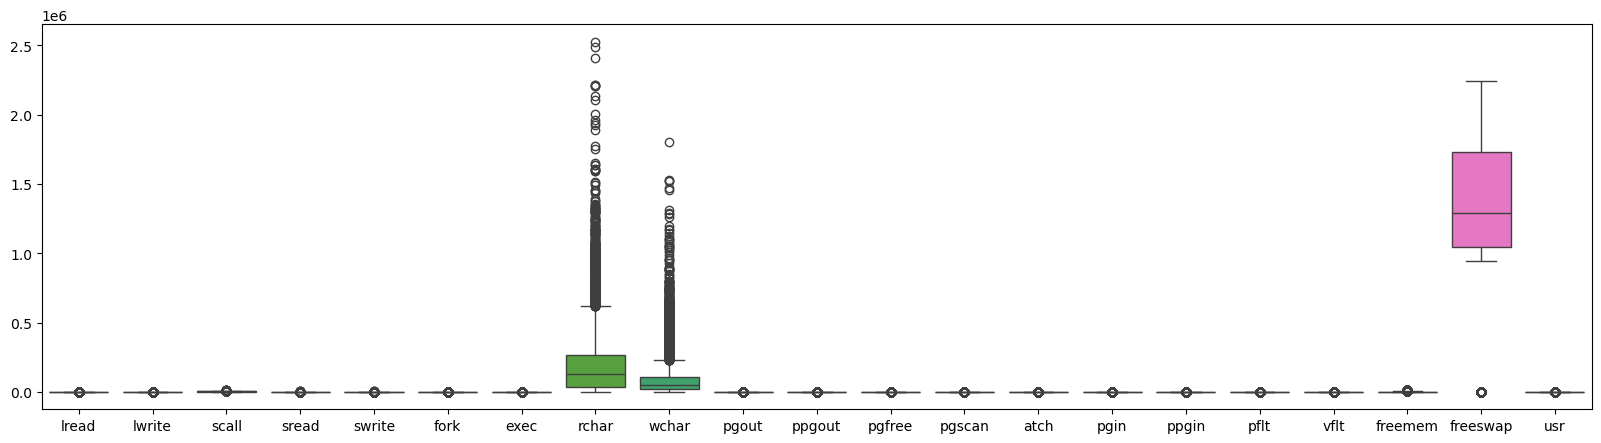

In [7]:
# Analysing the data with the method of univariate analysis with the boxplot.
plt.figure(figsize=(20,5))
sns.boxplot(data=df)

### Dependent Variable

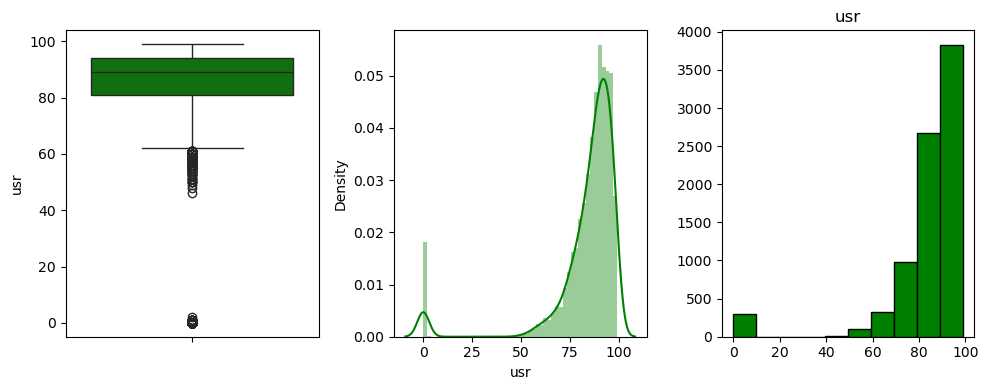

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('usr')
sns.boxplot(df['usr'],color='g', ax=axes[0])

sns.distplot(df['usr'], color='g',ax=axes[1])
df.hist(column='usr', grid=False, color='g',edgecolor='black',ax=axes[2])
plt.subplots_adjust()
plt.tight_layout()

plt.show()

### Independent Variable

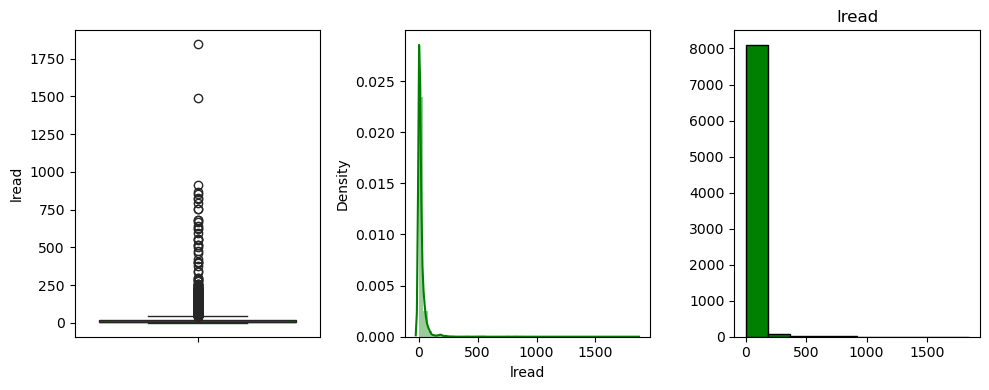

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('lread')
sns.boxplot(df['lread'],color='g', ax=axes[0])

sns.distplot(df['lread'], color='g',ax=axes[1])
df.hist(column='lread', grid=False, color='g',edgecolor='black',ax=axes[2])
plt.subplots_adjust()
plt.tight_layout()

plt.show()

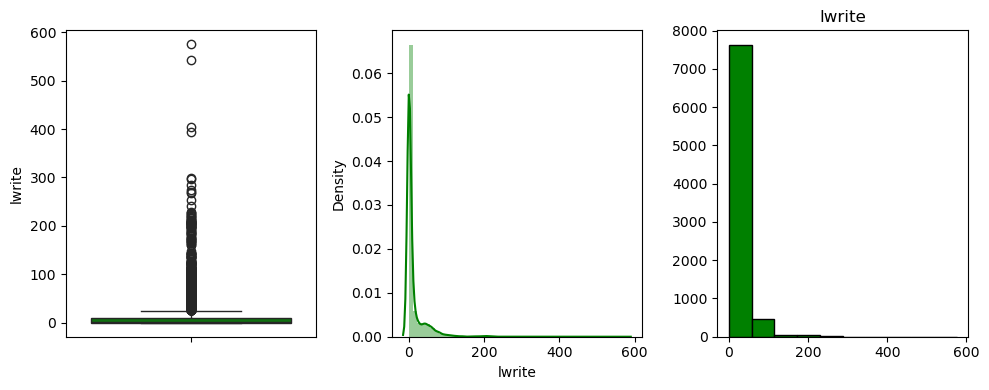

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('lwrite')
sns.boxplot(df['lwrite'],color='g', ax=axes[0])

sns.distplot(df['lwrite'], color='g',ax=axes[1])
df.hist(column='lwrite', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

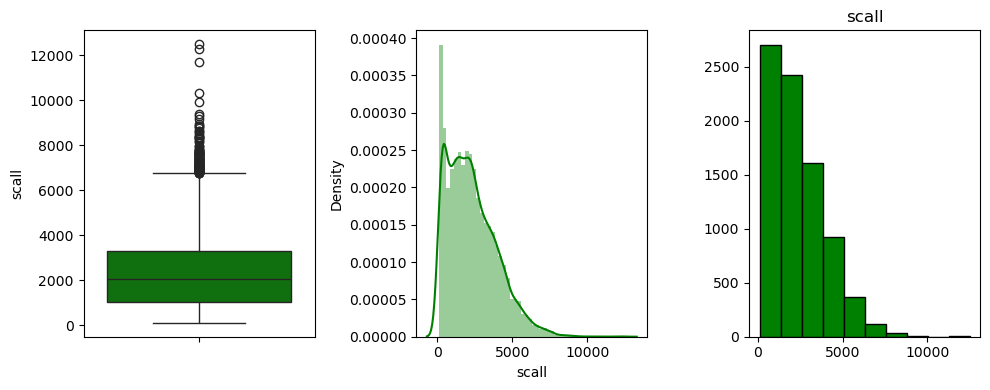

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('scall')
sns.boxplot(df['scall'],color='g', ax=axes[0])

sns.distplot(df['scall'], color='g',ax=axes[1])
df.hist(column='scall', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

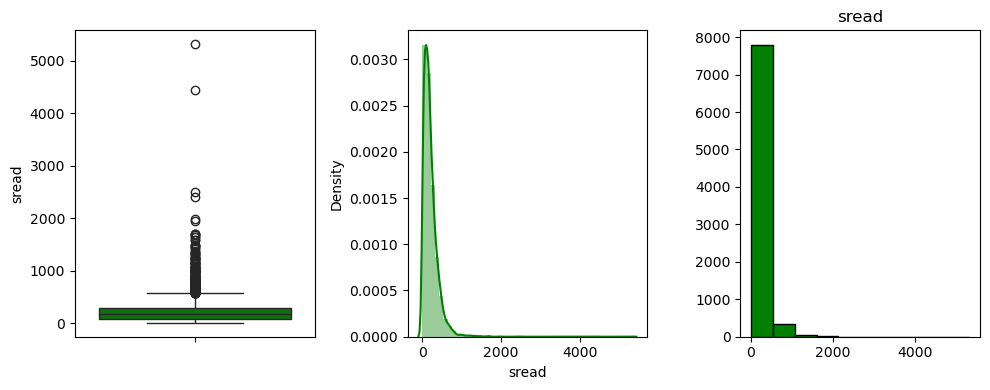

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('sread')
sns.boxplot(df['sread'],color='g', ax=axes[0])

sns.distplot(df['sread'], color='g',ax=axes[1])
df.hist(column='sread', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

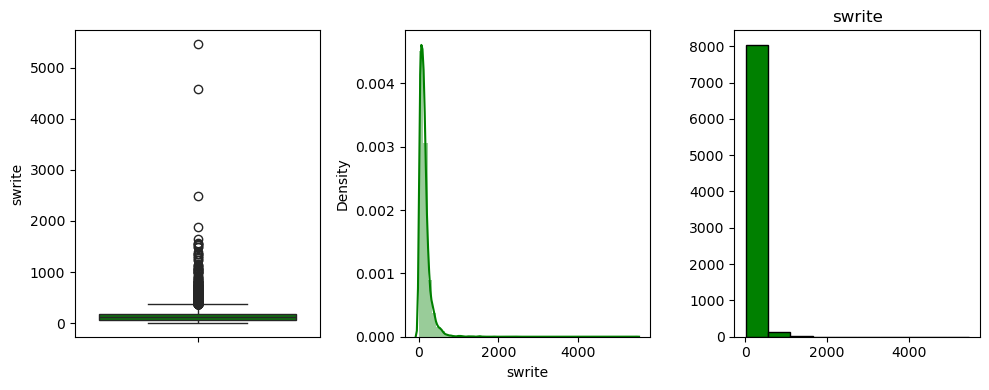

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('swrite')
sns.boxplot(df['swrite'],color='g', ax=axes[0])

sns.distplot(df['swrite'], color='g',ax=axes[1])
df.hist(column='swrite', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

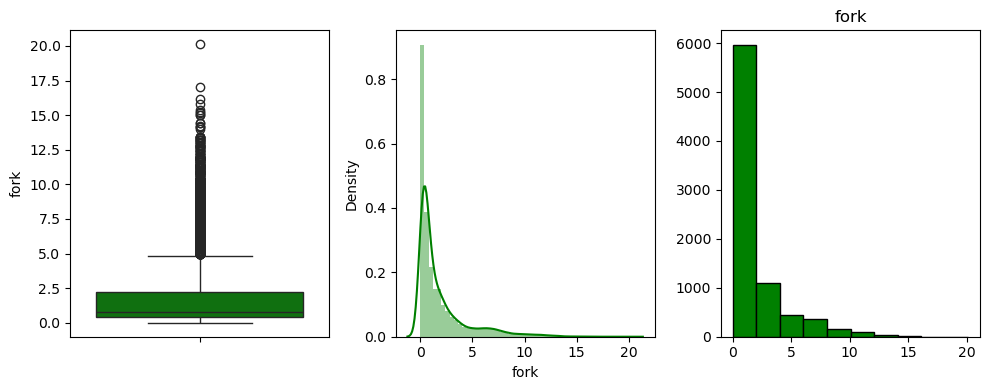

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('fork')
sns.boxplot(df['fork'],color='g', ax=axes[0])

sns.distplot(df['fork'], color='g',ax=axes[1])
df.hist(column='fork', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

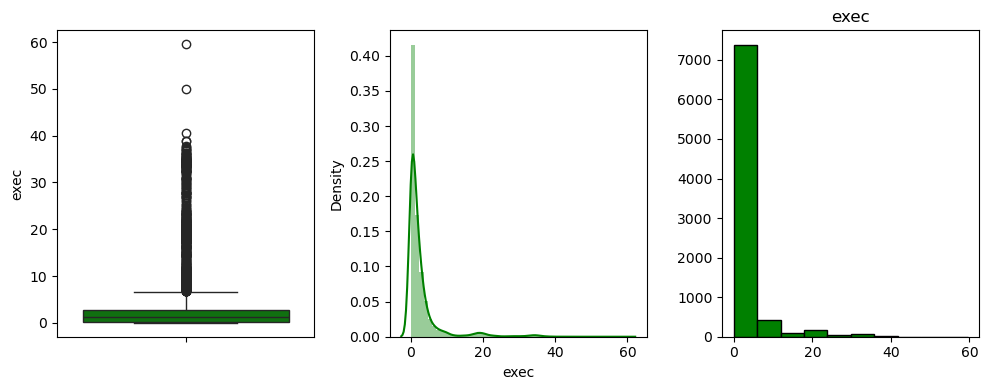

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('exec')
sns.boxplot(df['exec'],color='g', ax=axes[0])

sns.distplot(df['exec'], color='g',ax=axes[1])
df.hist(column='exec', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

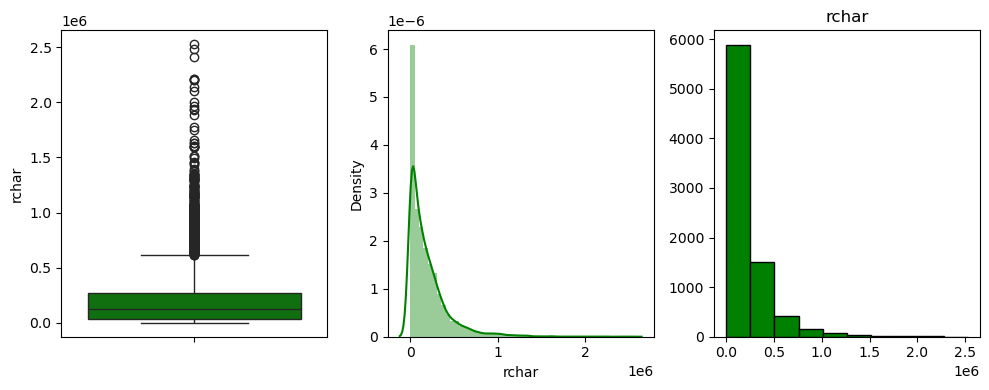

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('rchar')
sns.boxplot(df['rchar'],color='g', ax=axes[0])

sns.distplot(df['rchar'], color='g',ax=axes[1])
df.hist(column='rchar', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

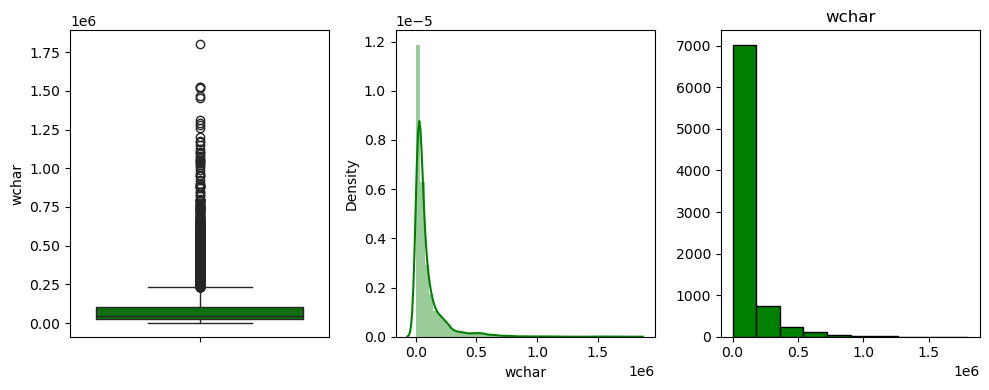

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('wchar')
sns.boxplot(df['wchar'],color='g', ax=axes[0])

sns.distplot(df['wchar'], color='g',ax=axes[1])
df.hist(column='wchar', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

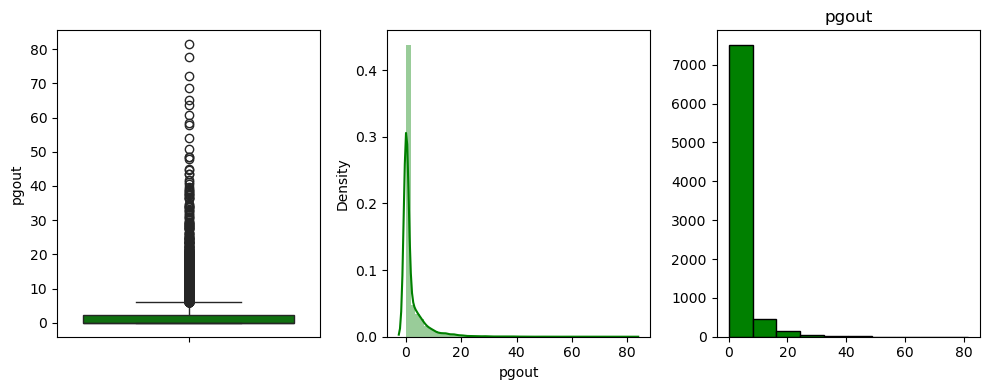

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgout')
sns.boxplot(df['pgout'],color='g', ax=axes[0])

sns.distplot(df['pgout'], color='g',ax=axes[1])
df.hist(column='pgout', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

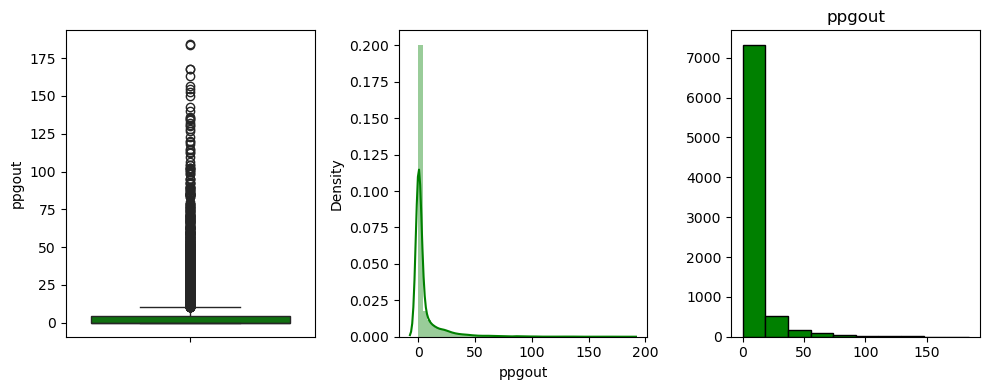

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('ppgout')
sns.boxplot(df['ppgout'],color='g', ax=axes[0])

sns.distplot(df['ppgout'], color='g',ax=axes[1])
df.hist(column='ppgout', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

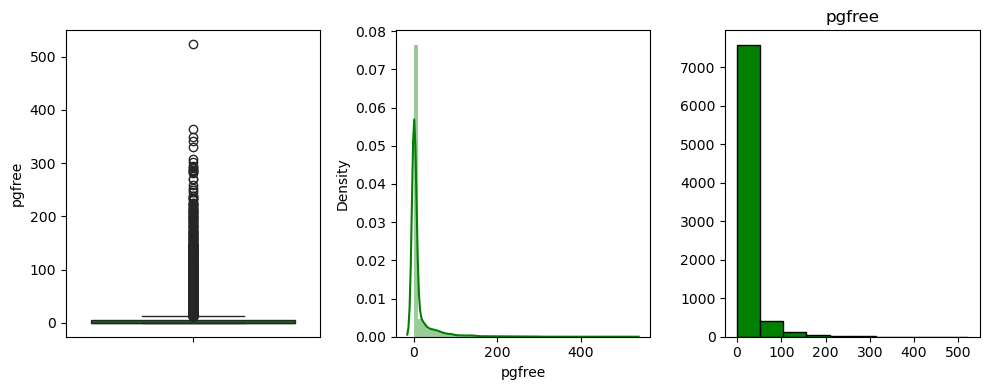

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgfree')
sns.boxplot(df['pgfree'],color='g', ax=axes[0])

sns.distplot(df['pgfree'], color='g',ax=axes[1])
df.hist(column='pgfree', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

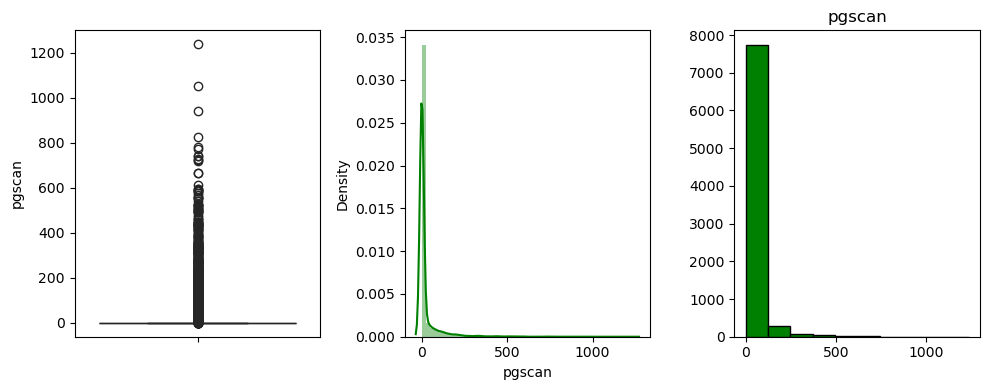

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgscan')
sns.boxplot(df['pgscan'],color='g', ax=axes[0])

sns.distplot(df['pgscan'], color='g',ax=axes[1])
df.hist(column='pgscan', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

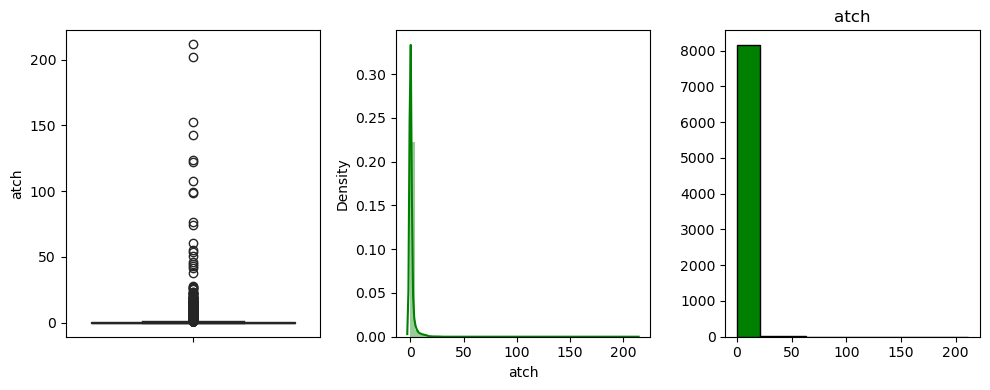

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('atch')
sns.boxplot(df['atch'],color='g', ax=axes[0])

sns.distplot(df['atch'], color='g',ax=axes[1])
df.hist(column='atch', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

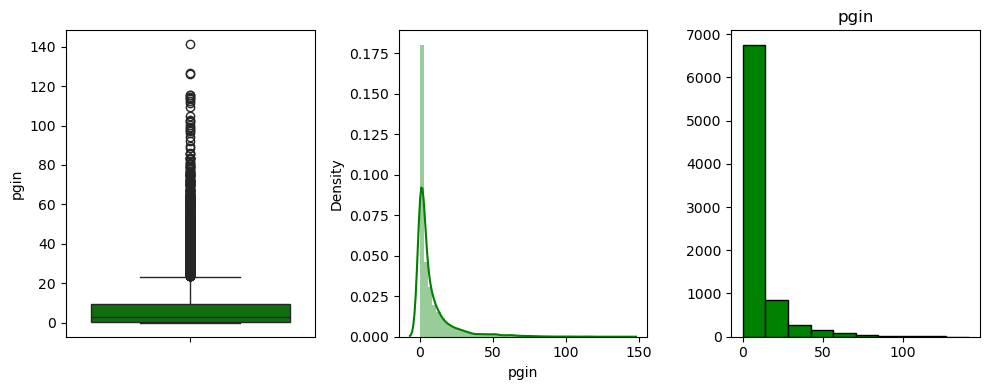

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgin')
sns.boxplot(df['pgin'],color='g', ax=axes[0])

sns.distplot(df['pgin'], color='g',ax=axes[1])
df.hist(column='pgin', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

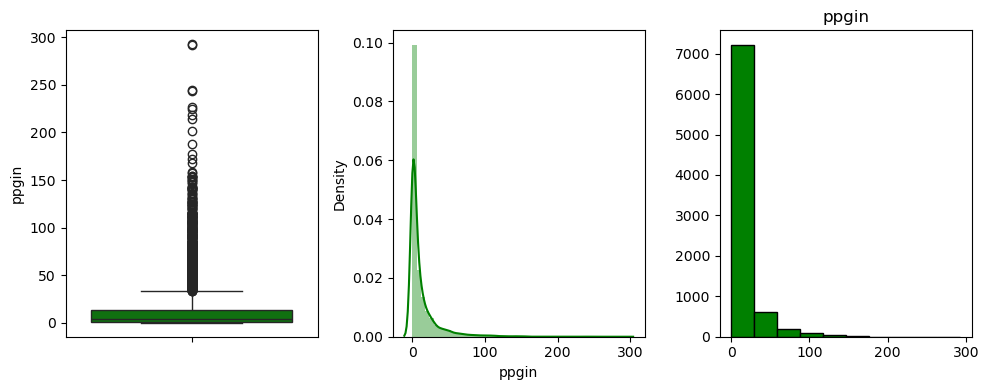

In [24]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('ppgin')
sns.boxplot(df['ppgin'],color='g', ax=axes[0])

sns.distplot(df['ppgin'], color='g',ax=axes[1])
df.hist(column='ppgin', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

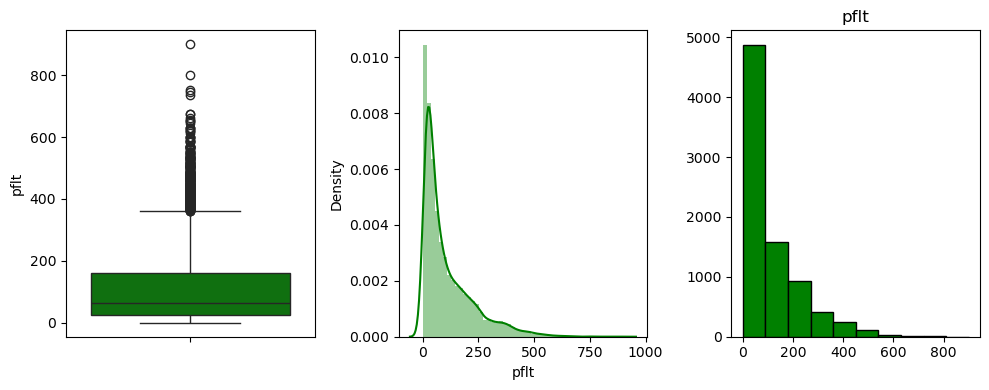

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pflt')
sns.boxplot(df['pflt'],color='g', ax=axes[0])

sns.distplot(df['pflt'], color='g',ax=axes[1])
df.hist(column='pflt', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

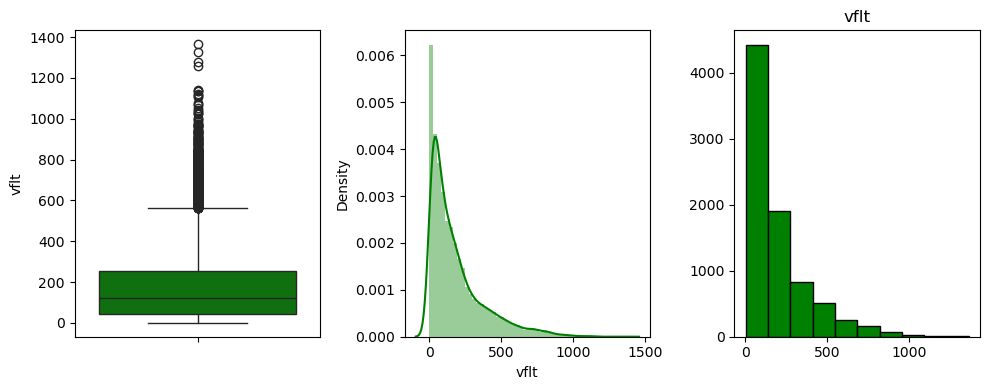

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('vflt')
sns.boxplot(df['vflt'],color='g', ax=axes[0])

sns.distplot(df['vflt'], color='g',ax=axes[1])
df.hist(column='vflt', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

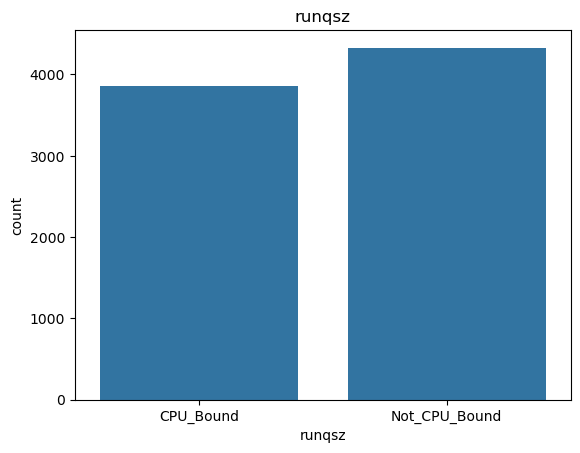

In [27]:
plt.title('runqsz')
sns.countplot(data=df, x='runqsz')

plt.show()

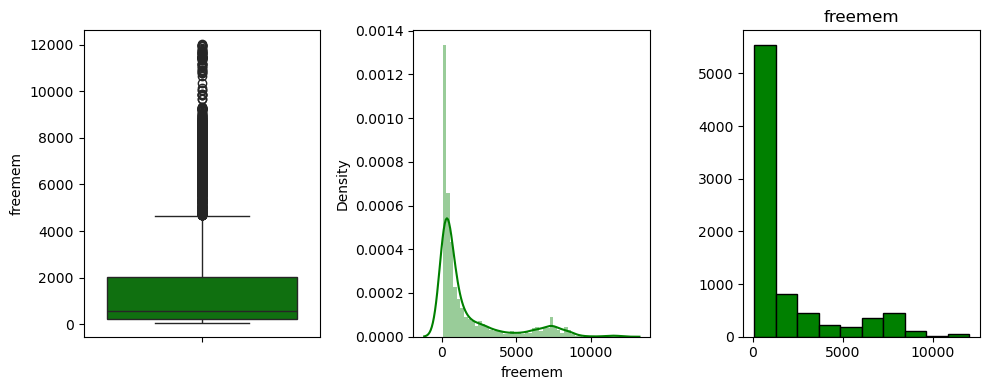

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('freemem')
sns.boxplot(df['freemem'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['freemem'], color='g',ax=axes[1])
df.hist(column='freemem', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

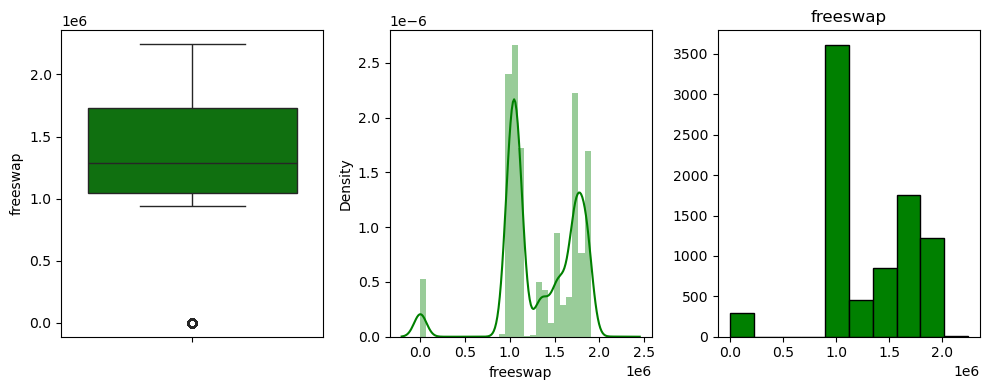

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('freeswap')
sns.boxplot(df['freeswap'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['freeswap'], color='g',ax=axes[1])
df.hist(column='freeswap', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

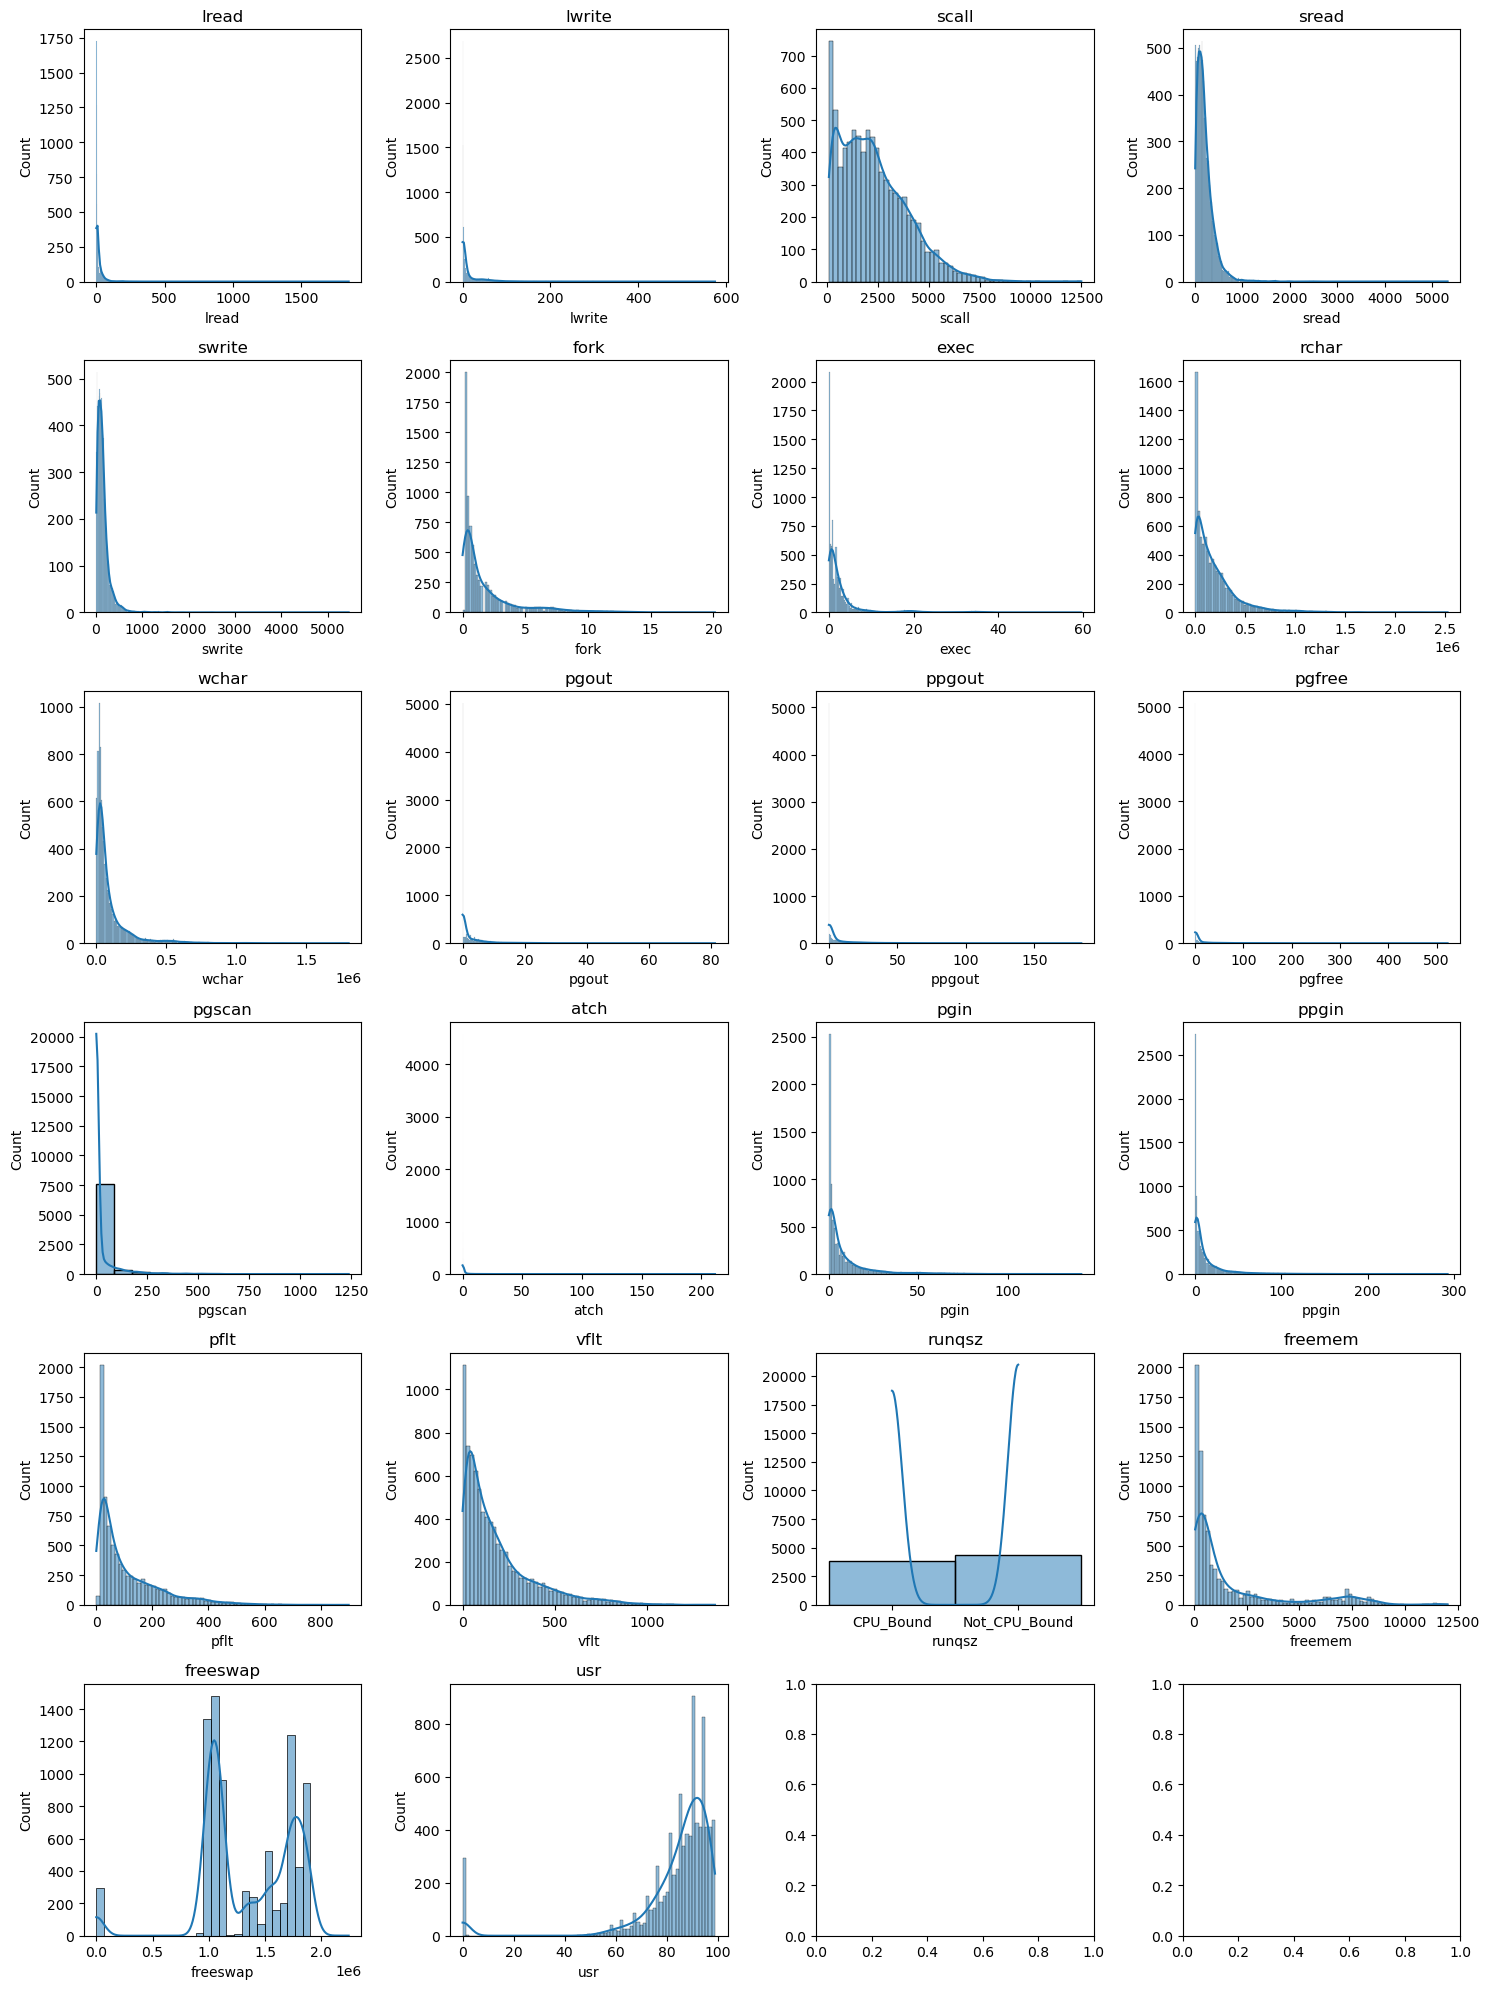

In [30]:
fig, axs = plt.subplots(6, 4, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axs[i],kde=True)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

### Multivariate Analysis

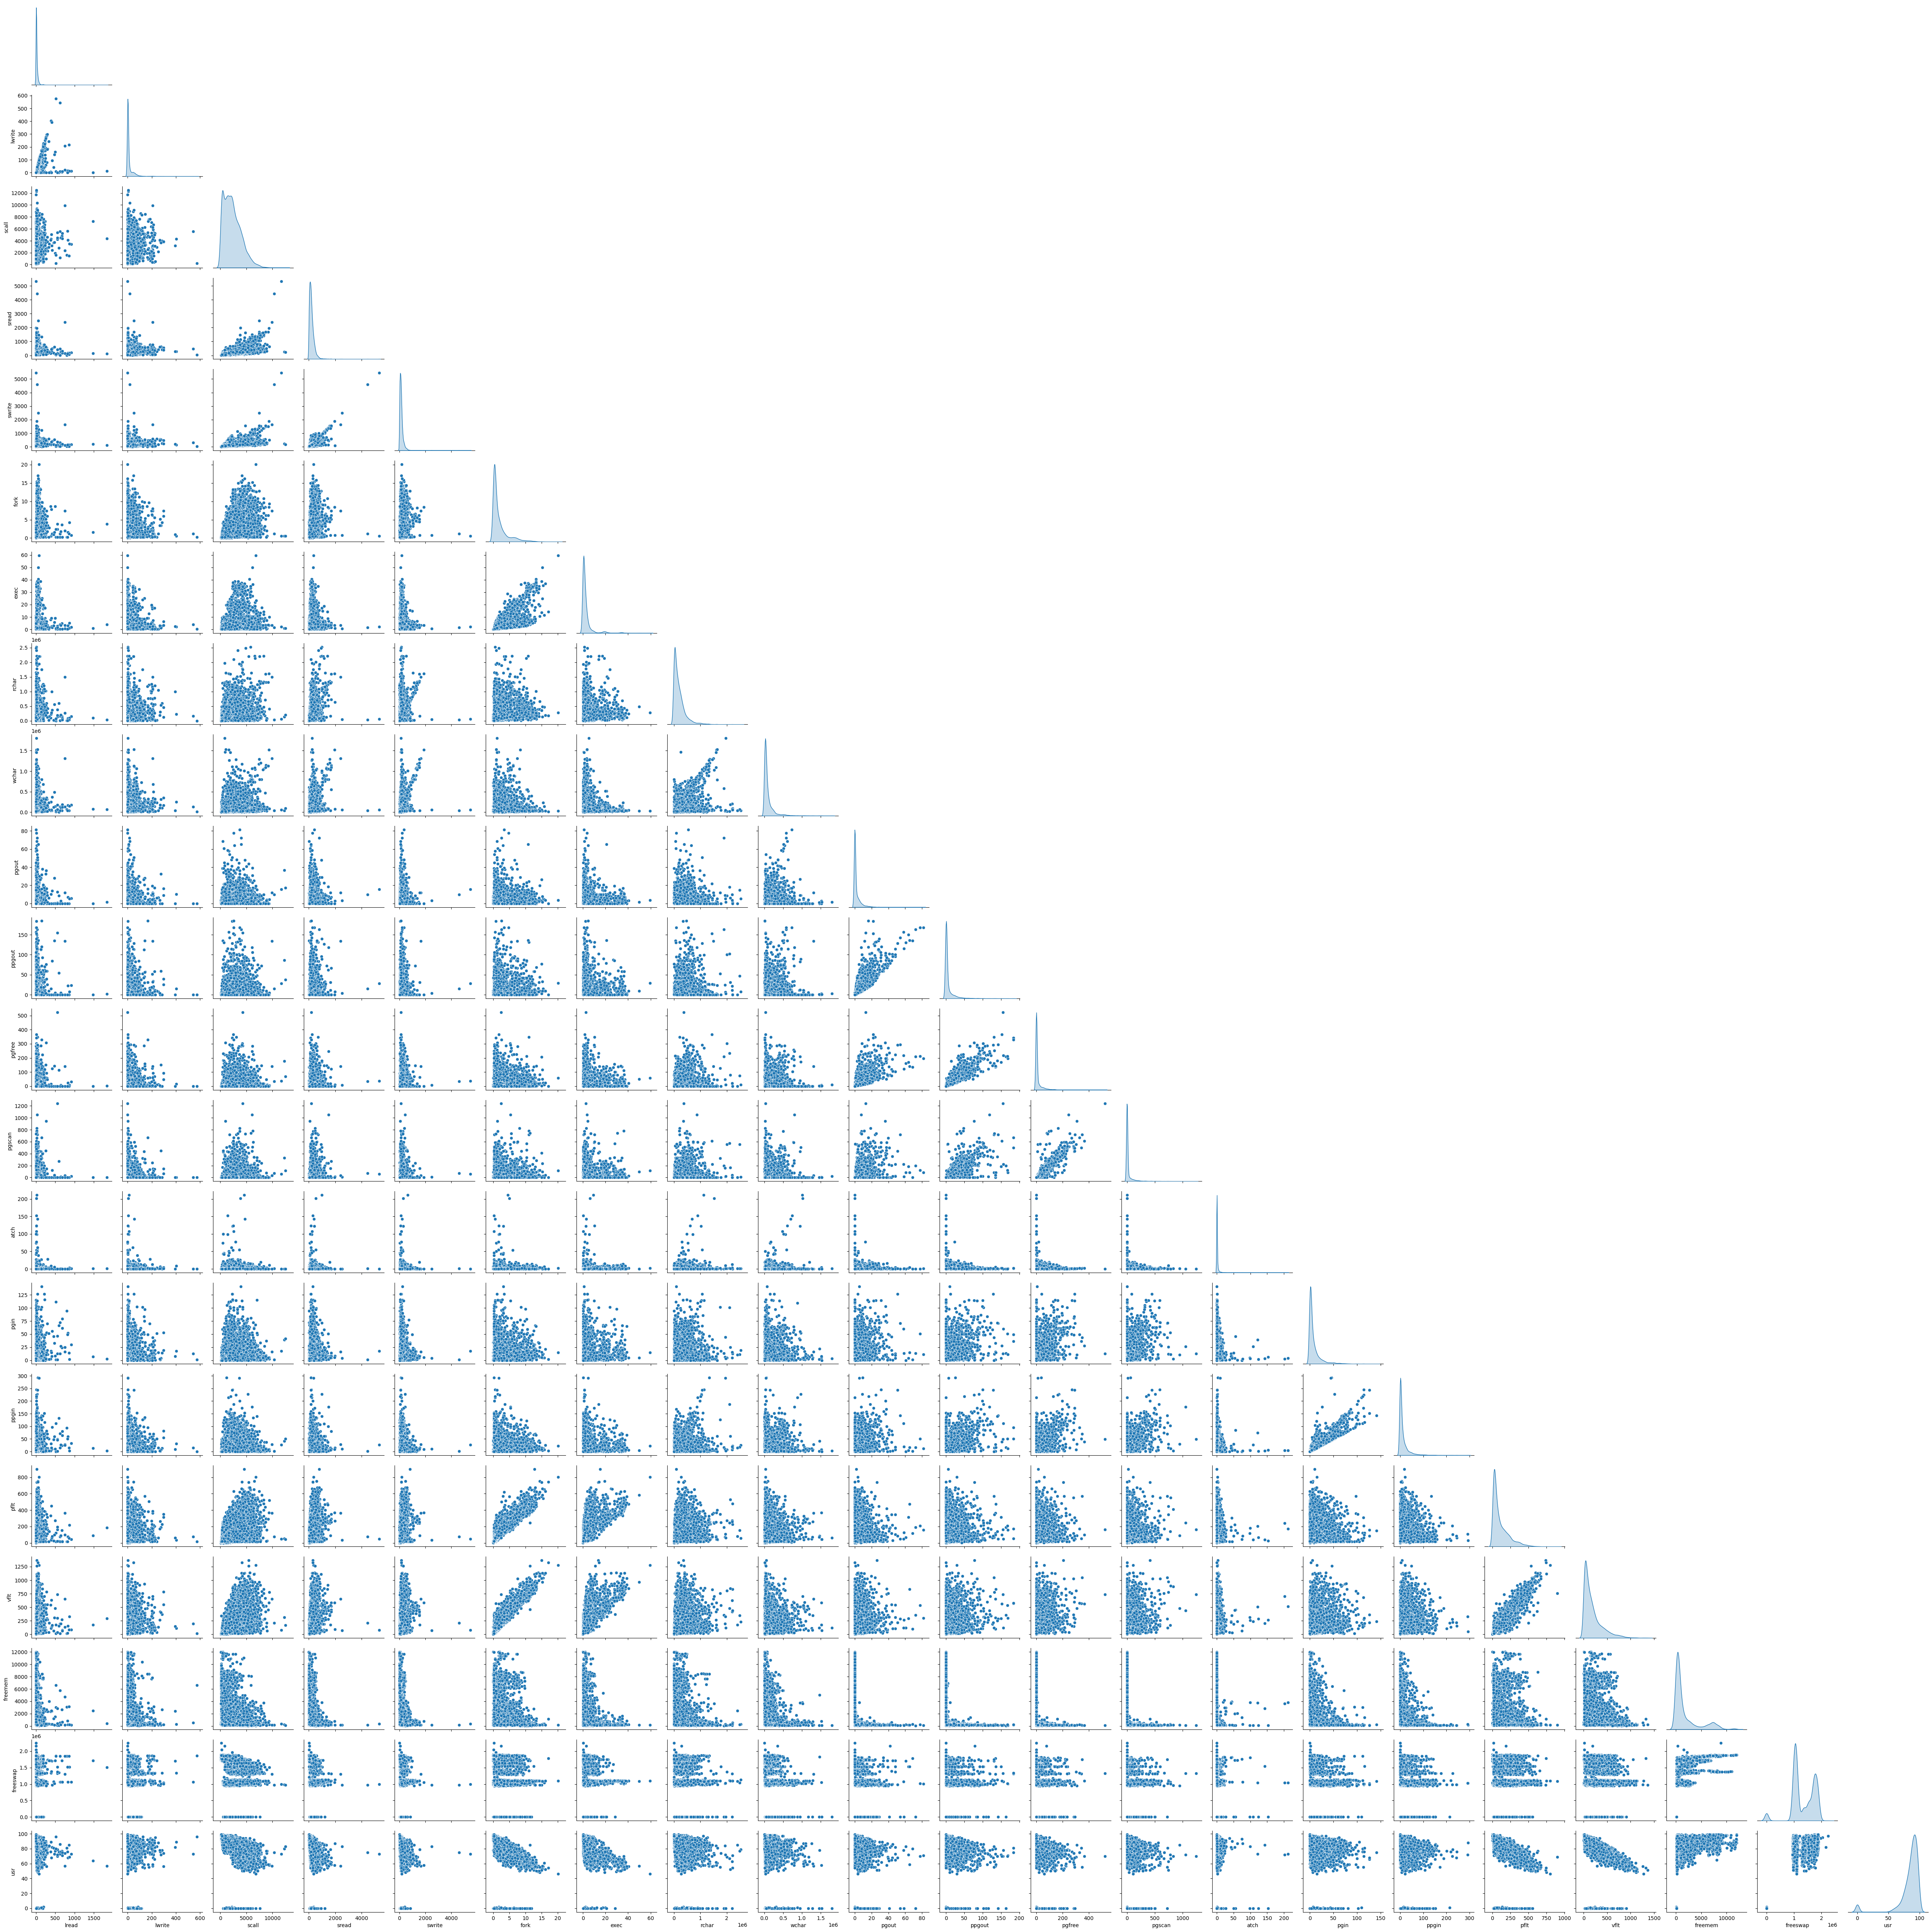

In [31]:
sns.pairplot(df, diag_kind='kde',corner=True);

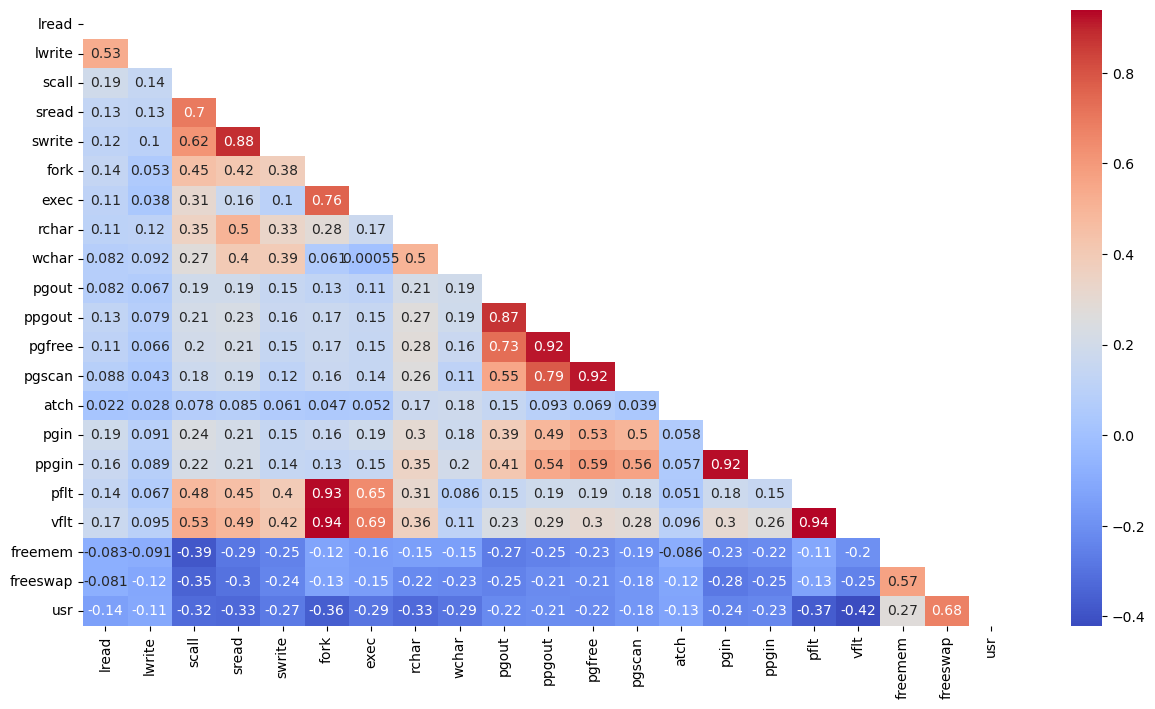

In [32]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

fig = plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_numeric.corr()))

corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask, annot_kws={'size': 10})
plt.grid(False)
plt.show()

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

#### Imputing missing values

In [33]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [34]:
df['rchar'].fillna(int(df['rchar'].median()), inplace=True)

In [35]:
df['wchar'].fillna(int(df['wchar'].median()), inplace=True)

In [36]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [37]:
# Check for zero values in each column
zero_values = (df == 0).sum()

In [38]:
# Display columns with zero values
columns_with_zeros = zero_values[zero_values > 0]
print("Columns with Zero Values:")
print(columns_with_zeros)

Columns with Zero Values:
lread      675
lwrite    2684
fork        21
exec        21
pgout     4878
ppgout    4878
pgfree    4869
pgscan    6448
atch      4575
pgin      1220
ppgin     1220
pflt         3
usr        283
dtype: int64


In [39]:
#We will divide numerical columns and categorical columns with df_num and df_cat respectively
df_num=df.select_dtypes(include=['float64','int64'])
df_num.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [40]:
df_cat=df.select_dtypes(include=['object'])
df_cat.columns

Index(['runqsz'], dtype='object')

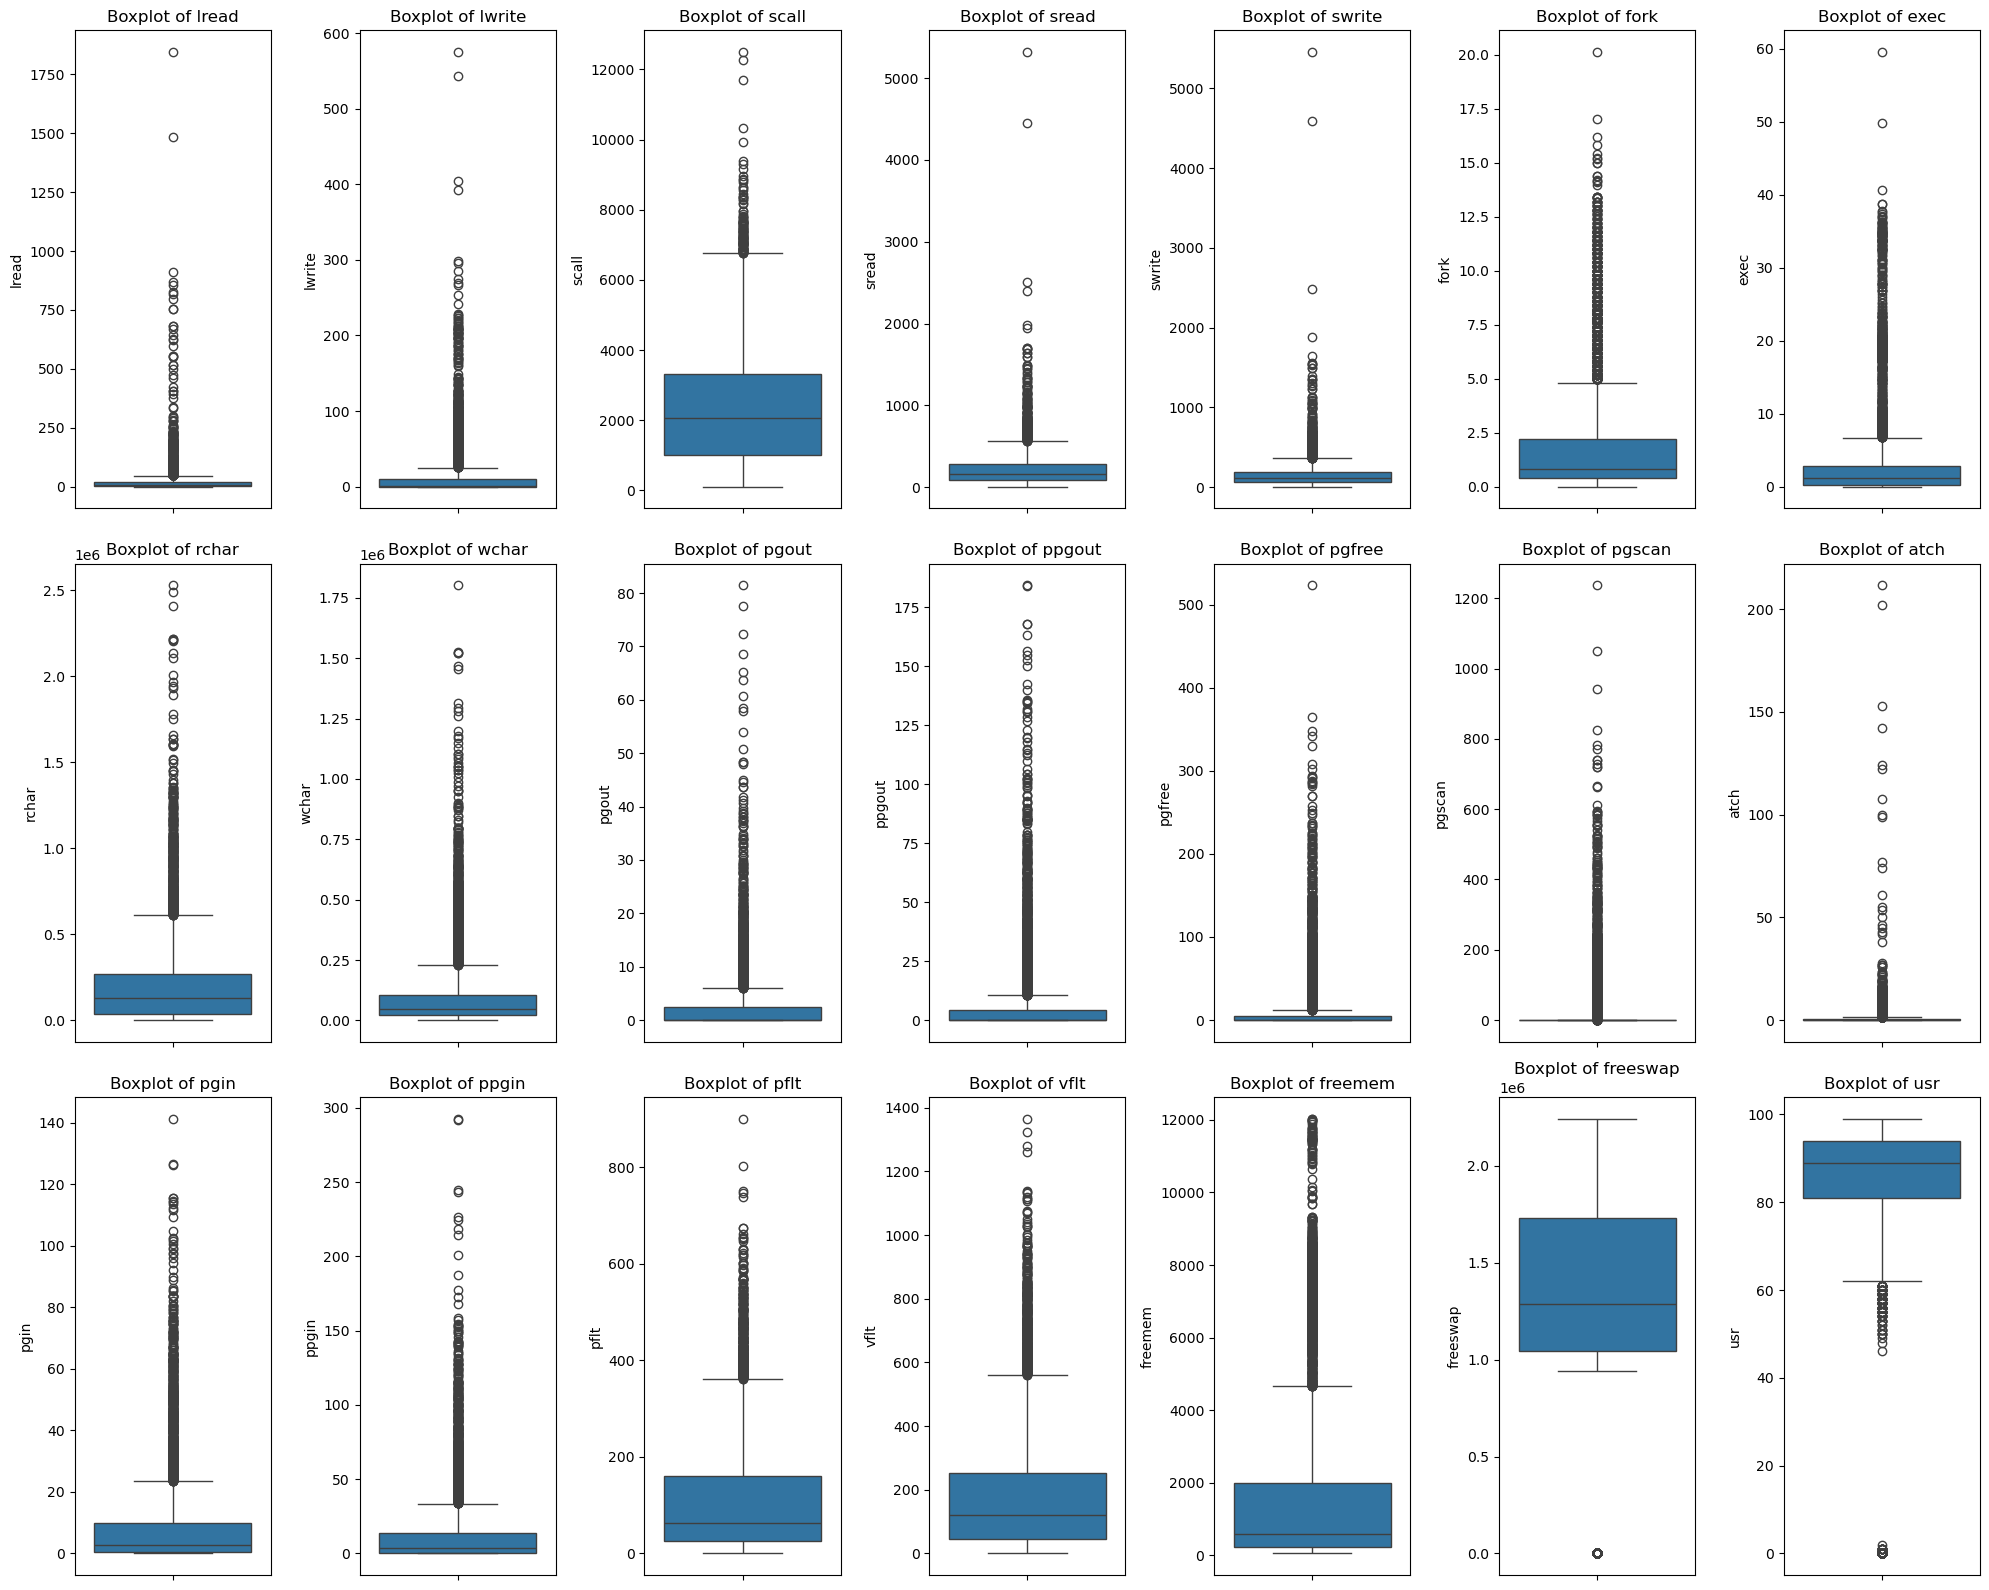

In [41]:
#checking outliers with the help of boxplot
plt.figure(figsize=(20,16))
feature_list=df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3,7, i+1)
    sns.boxplot(y=df_num[feature_list[i]], data=df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [42]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [43]:
outlier_list=[x for x in df_num.columns]

In [44]:
for column in df[outlier_list].columns:
    lr,ur=remove_outlier(df_num[column])
    df_num[column]=np.where(df_num[column]>ur,ur,df_num[column])
    df_num[column]=np.where(df_num[column]<lr,lr,df_num[column])

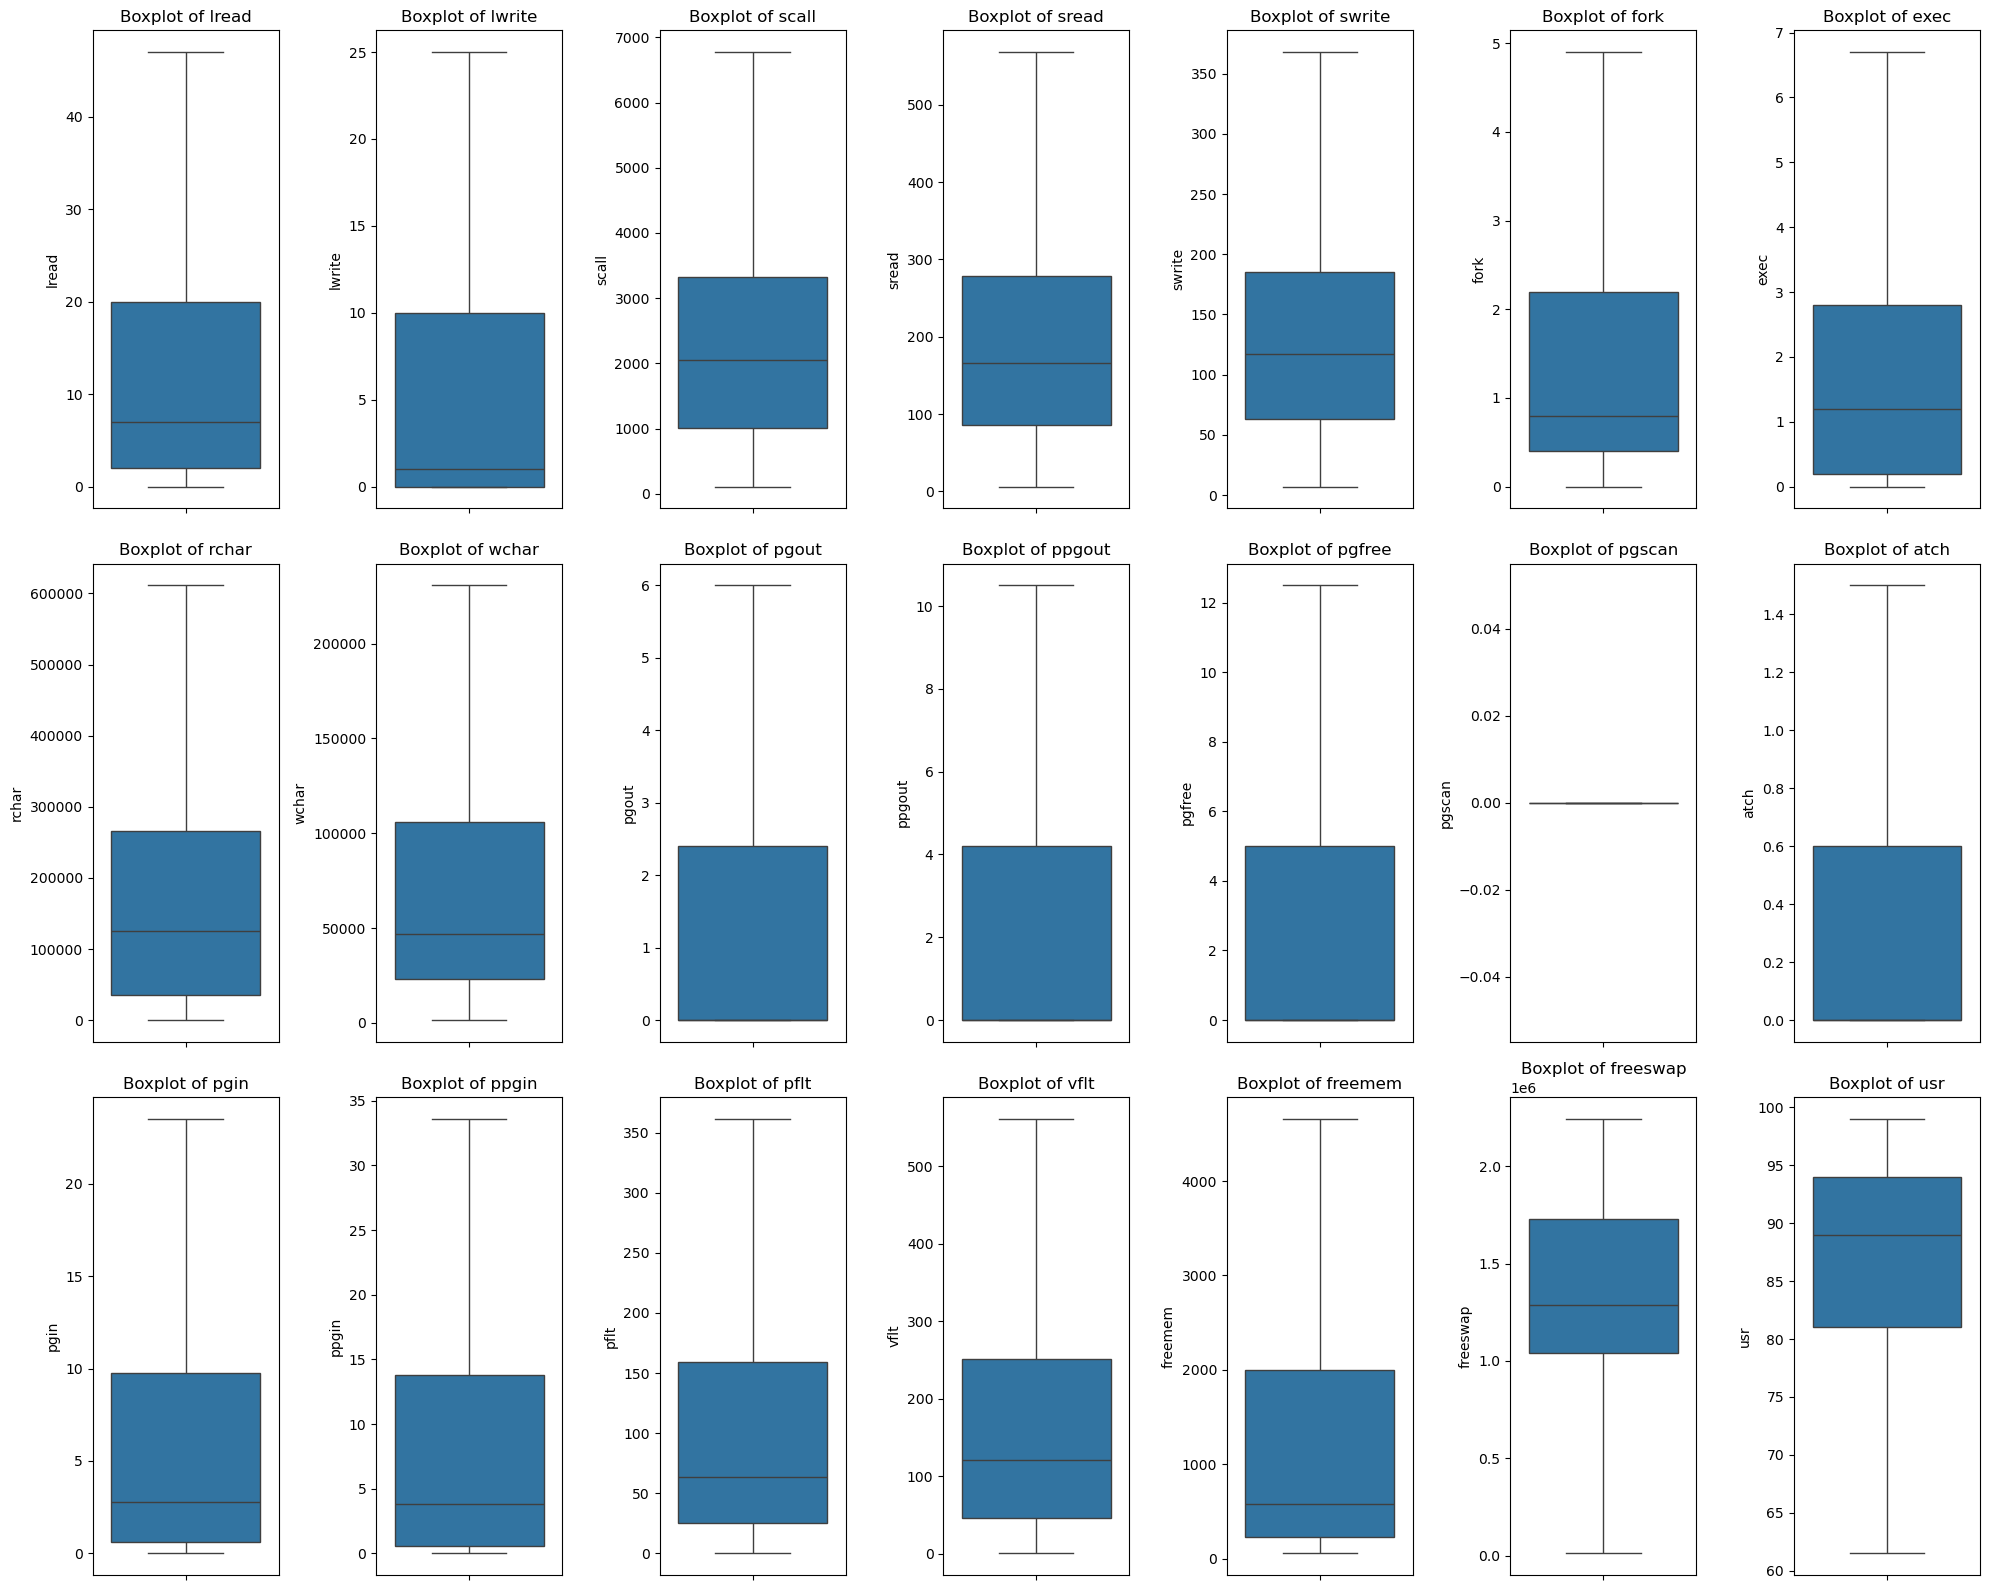

In [45]:
plt.figure(figsize=(20,16))
feature_list=df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3,7, i+1)
    sns.boxplot(y=df_num[feature_list[i]], data=df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [46]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ', df[column].nunique())
        print(df[column].value_counts(normalize = True).sort_values())
        print('\n')

RUNQSZ :  2
runqsz
CPU_Bound        0.471313
Not_CPU_Bound    0.528687
Name: proportion, dtype: float64




In [47]:
df['runqsz'].replace(['CPU_Bound','Not_CPU_Bound'],[0,1], inplace=True)

In [48]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.0  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.0   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.0  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  freeswap  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40       0     4670   1730946   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83       1     7278   1869002   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20       1      702   1021237   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80       1     7248   1863704   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60       1      633   1760253   

   usr  
0   95  
1   97  
2   87  
3   98  
4   90  

[5 rows x 22 columns]

In [49]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.0  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.0   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.0  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  freeswap  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40       0     4670   1730946   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83       1     7278   1869002   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20       1      702   1021237   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80       1     7248   1863704   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60       1      633   1760253   

   usr  
0   95  
1   97  
2   87  
3   98  
4   90  

[5 rows x 22 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   int64  
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [51]:
df.head().T

0           1          2          3          4
lread           1.0        0.00       15.0        0.0        5.0
lwrite          0.0        0.00        3.0        0.0        1.0
scall        2147.0      170.00     2162.0      160.0      330.0
sread          79.0       18.00      159.0       12.0       39.0
swrite         68.0       21.00      119.0       16.0       38.0
fork            0.2        0.20        2.0        0.2        0.4
exec            0.2        0.20        2.4        0.2        0.4
rchar       40671.0      448.00   125473.0   125473.0   125473.0
wchar       53995.0     8385.00    31950.0     8670.0    12185.0
pgout           0.0        0.00        0.0        0.0        0.0
ppgout          0.0        0.00        0.0        0.0        0.0
pgfree          0.0        0.00        0.0        0.0        0.0
pgscan          0.0        0.00        0.0        0.0        0.0
atch            0.0        0.00        1.2        0.0        0.0
pgin            1.6        0.00        6.0        0.2        1.0
ppgin           2.6        0.00        9.4        0.2        1.2
pflt           16.0       15.63      150.2       15.6       37.8
vflt           26.4       16.83      220.2       16.8       47.6
runqsz          0.0        1.00        1.0        1.0        1.0
freemem      4670.0     7278.00      702.0     7248.0      633.0
freeswap  1730946.0  1869002.00  1021237.0  1863704.0  1760253.0
usr            95.0       97.00       87.0       98.0       90.0

#### Train-Test Split

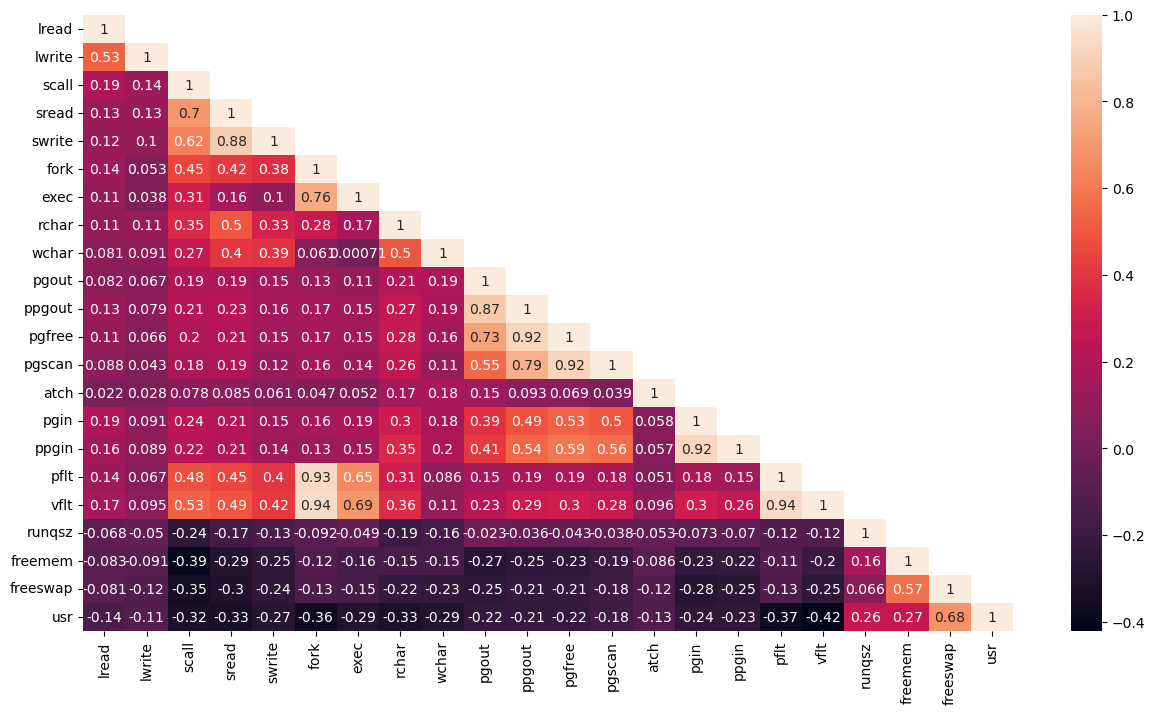

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(df_dummy.corr(),annot=True,mask=np.triu(df_dummy.corr(),+1))
plt.grid(False)
plt.show()

In [211]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe.
y = df[['usr']]

In [212]:
X.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.0  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.0   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.0  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40       0     4670   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83       1     7278   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20       1      702   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80       1     7248   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60       1      633   

   freeswap  
0   1730946  
1   1869002  
2   1021237  
3   1863704  
4   1760253  

[5 rows x 21 columns]

In [213]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=7)

In [214]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [215]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for lread is -0.01912353490246144
The coefficient for lwrite is 0.003693063069699321
The coefficient for scall is 0.0011110103462175333
The coefficient for sread is -3.296129433556031e-05
The coefficient for swrite is -0.0003877717489737206
The coefficient for fork is -1.8600619380581376
The coefficient for exec is -0.018829885951786408
The coefficient for rchar is -4.088230371407028e-06
The coefficient for wchar is -1.1230620678886636e-05
The coefficient for pgout is -0.21043187842279124
The coefficient for ppgout is 0.111589042950414
The coefficient for pgfree is -0.07485138291710622
The coefficient for pgscan is 0.012518872418055842
The coefficient for atch is -0.025919535371864658
The coefficient for pgin is 0.04872114181390669
The coefficient for ppgin is -0.03343161570215487
The coefficient for pflt is -0.04116961347420954
The coefficient for vflt is 0.022439953131513358
The coefficient for runqsz is 8.055236282116892
The coefficient for freemem is -0.001634086012

In [216]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 42.21642790179804


In [217]:
# R square on training data
regression_model.score(X_train, y_train)

0.6413678769409354

In [218]:
# R square on testing data
regression_model.score(X_test, y_test)

0.6359429828421388

In [219]:
# This adds the constant term beta0 to the Simple Linear Regression.
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [220]:
model = sm.OLS(y_train,X_train).fit();

In [221]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     486.4
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:46   Log-Likelihood:                -21907.
No. Observations:                5734   AIC:                         4.386e+04
Df Residuals:                    5712   BIC:                         4.400e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2164      0.743     56.856      0.0

In [222]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       25.834021
lread        1.425899
lwrite       1.359997
scall        2.556203
sread        6.388146
swrite       5.101808
fork        18.457952
exec         3.154641
rchar        1.954314
wchar        1.650668
pgout        5.394486
ppgout      15.213056
pgfree      16.741983
pgscan       6.681022
atch         1.097394
pgin         7.122756
ppgin        7.471283
pflt        11.343146
vflt        19.272809
runqsz       1.115775
freemem      1.688296
freeswap     1.734612
dtype: float64



#### Dropping multicollinear columns one by one

In [223]:
X_train2 = X_train.drop(["vflt"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.639 
Adjusted R-squared: 0.637


In [224]:
X_train3 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.64


In [225]:
X_train5 = X_train.drop(["pflt"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train5)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.636 
Adjusted R-squared: 0.634


##### Noting down the R-squred and the Adjusted R-squared we can say dropping the variable "sread", "pflt" and "Pgin" would bring less or no decrese in the model efficiency

In [226]:
X = df.drop(['usr', 'sread', 'fork','ppgout', 'pflt', 'pgin'], axis=1)
y = df['usr']

In [227]:
# let's add the intercept to data
X = sm.add_constant(X)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [229]:
olsmod = sm.OLS(y_train, X_train)
ols = olsmod.fit()

In [230]:
print(ols.summary())  

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     598.0
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:51   Log-Likelihood:                -22028.
No. Observations:                5734   AIC:                         4.409e+04
Df Residuals:                    5717   BIC:                         4.420e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6508      0.730     61.144      0.0

The concept of multicollinearity has been solved by VIF. The threshold has been set 5 and now all the variables have variabilty below 5.

P-value test for importance of feature and weather or not the features importance is zero.

From the OLS table above it can be noted that there is a 15.4% chance for variable "lwrite" to be least important among the group since the hypothesis test assumes that the important variable be less than or equal to the threshold of 0.05

In [231]:
X = df.drop(['usr', 'sread', 'fork', 'pflt','atch','pgfree','ppgout','pgscan', 'pgin', 'lwrite'], axis=1)
y = df['usr']

In [232]:
# let's add the intercept to data
X = sm.add_constant(X)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [234]:
olsmod = sm.OLS(y_train, X_train)
ols = olsmod.fit()

#### Final Model

In [235]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     796.1
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:57   Log-Likelihood:                -22031.
No. Observations:                5734   AIC:                         4.409e+04
Df Residuals:                    5721   BIC:                         4.418e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7266      0.724     61.817      0.0

Now, the multicollinearity and the p-value test has been sucessfully implemented and the model has now been nearly assigned a R-squared and Adj. R-squared score of 0.625 and 0.625 respectively.

#### 1 R-squared of the model is 0.625 and adjusted R-squared is 0.625, which shows that the model is able to explain ~62% variance in the data. This is quite phenomenal.

#### 2 A unit increase in the exec will result in a -0.2216 unit decrease in the usr, all other variables remaining constant.

#### 3 A unit increase in the independent variable will result in a const. unit increase/decrease in the usr.

#### 4 The usr of a in runqsz will be 8.1624 units, all other variables remaining constant

#### Linearity and Independence test

In [236]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = ols.fittedvalues.values  # predicted values
df_pred["Residuals"] = ols.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0             94     104.628028 -10.628028
1             93      96.585958  -3.585958
2             94      83.643445  10.356555
3             89     104.713292 -15.713292
4             89      84.940732   4.059268

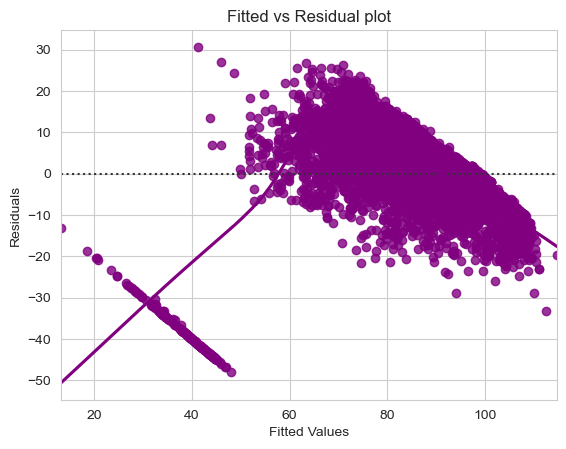

In [237]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

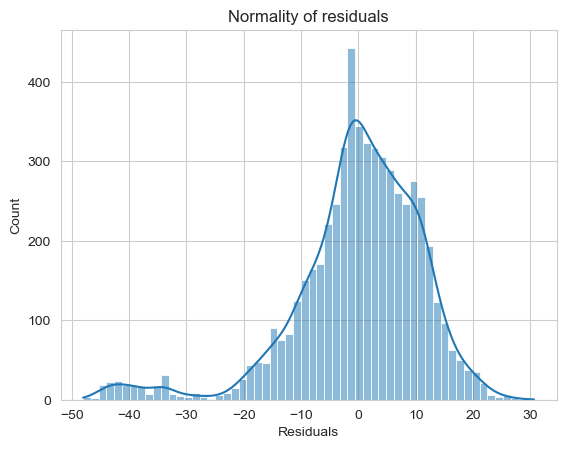

In [238]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

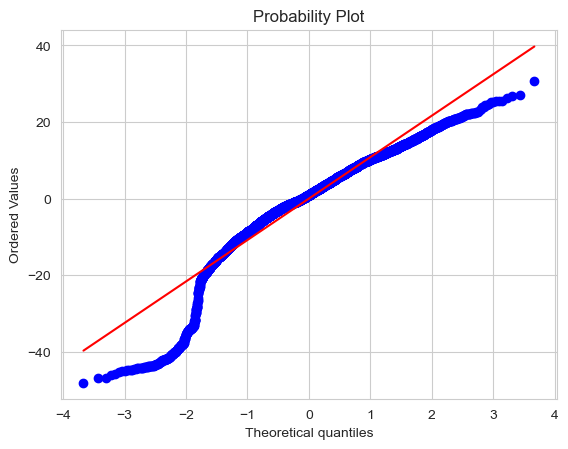

In [239]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most of the points are lying on the straight line in QQ plot. There can be few exceptions as suggested earlier getting a full perfect model can be highly challenging especially without domain intervention. However, the above QQ plot could saticify the need.

In [240]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9178640842437744, pvalue=0.0)

In [241]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.9801359942123439), ('p-value', 0.7039810193062644)]

#### Predictions, Linear Equation and RMSE score.

In [242]:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(ols.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            ols.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(ols.params[i], "* (", X_train.columns[i], ")")

usr = 44.7265794465873 + -0.017606930126931365 * ( lread ) +  0.0013104754055878296 * ( scall ) +  -0.003588610704149506 * ( swrite ) +  -0.21483555871040383 * ( exec ) +  -3.923227735046858e-06 * ( rchar ) +  -1.123941624799491e-05 * ( wchar ) +  -0.11866072963189492 * ( pgout ) +  0.022837196755036832 * ( ppgin ) +  -0.02168456717111633 * ( vflt ) +  8.174295092041636 * ( runqsz ) +  -0.0016921375777316518 * ( freemem ) +  3.176812524640479e-05 * ( freeswap )


In [243]:
X_train.columns

Index(['const', 'lread', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'ppgin', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [244]:
X_test.columns

Index(['const', 'lread', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'ppgin', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [245]:
# Predictions
y_pred = ols.predict(X_test)

In [246]:
# Check RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

11.283123504049726

In [247]:
# Check RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

11.329079759988172

In [248]:
# check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

8.150261666571266

In [249]:
# check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

8.185690555404978

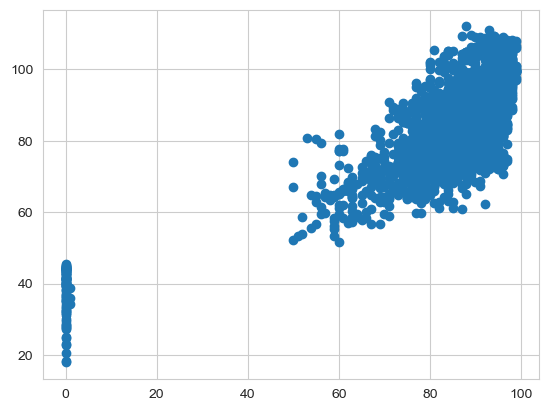

In [92]:
plt.scatter(y_test, y_pred)
plt.show()

In [93]:
X = df.drop(['usr', 'sread', 'fork', 'pflt', 'pgin', 'lwrite'], axis=1)
y = df['usr']

In [94]:
# let's add the intercept to data
X = sm.add_constant(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [96]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.017897370337851243
The coefficient for scall is 0.0013158169706197324
The coefficient for swrite is -0.0035830960690201637
The coefficient for exec is -0.22164007440937847
The coefficient for rchar is -4.0682179229274e-06
The coefficient for wchar is -1.1383127925041012e-05
The coefficient for pgout is -0.2253316020381911
The coefficient for ppgout is 0.08921595025943148
The coefficient for pgfree is -0.043369534562156746
The coefficient for pgscan is 0.01085590167416722
The coefficient for atch is 0.023043262565468323
The coefficient for ppgin is 0.01780515504409055
The coefficient for vflt is -0.021756156904076455
The coefficient for runqsz is 8.162387023218644
The coefficient for freemem is -0.0016938584415082663
The coefficient for freeswap is 3.171146242184758e-05


In [98]:
# R square on training data
regression_model.score(X_train, y_train)

0.626193156572201

In [99]:
# R square on testing data
regression_model.score(X_test, y_test)

0.6181741187969207

In [100]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

11.272062678395427

In [101]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

11.317997252568398

# Problem - 2

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import load_iris


import warnings
warnings.filterwarnings('ignore')

In [103]:
data = pd.read_excel('Contraceptive_method_dataset.xlsx')
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [104]:
data.shape

(1473, 10)

In [105]:
data.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [107]:
#checking null values
data.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [108]:
data.describe(include='all').T

count unique          top  freq       mean  \
Wife_age                   1402.0    NaN          NaN   NaN  32.606277   
Wife_ education              1473      4     Tertiary   577        NaN   
Husband_education            1473      4     Tertiary   899        NaN   
No_of_children_born        1452.0    NaN          NaN   NaN   3.254132   
Wife_religion                1473      2  Scientology  1253        NaN   
Wife_Working                 1473      2           No  1104        NaN   
Husband_Occupation         1473.0    NaN          NaN   NaN   2.137814   
Standard_of_living_index     1473      4    Very High   684        NaN   
Media_exposure               1473      2      Exposed  1364        NaN   
Contraceptive_method_used    1473      2          Yes   844        NaN   

                                std   min   25%   50%   75%   max  
Wife_age                   8.274927  16.0  26.0  32.0  39.0  49.0  
Wife_ education                 NaN   NaN   NaN   NaN   NaN   NaN  
Husband_education               NaN   NaN   NaN   NaN   NaN   NaN  
No_of_children_born        2.365212   0.0   1.0   3.0   4.0  16.0  
Wife_religion                   NaN   NaN   NaN   NaN   NaN   NaN  
Wife_Working                    NaN   NaN   NaN   NaN   NaN   NaN  
Husband_Occupation         0.864857   1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index        NaN   NaN   NaN   NaN   NaN   NaN  
Media_exposure                  NaN   NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used       NaN   NaN   NaN   NaN   NaN   NaN

In [109]:
data.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [110]:
data.rename(columns = {'Media_exposure ':'Media_exposure'}, inplace = True)

In [111]:
data.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True)

In [112]:
data.groupby('Wife_education')['Wife_age'].median()

Wife_education
Primary       30.0
Secondary     30.0
Tertiary      33.0
Uneducated    39.0
Name: Wife_age, dtype: float64

In [113]:
data['Wife_age'] = np.where((data['Wife_age'].isnull() & (data['Wife_education']=="Tertiary")),33, data['Wife_age'])

In [114]:
data['Wife_age'] = np.where((data['Wife_age'].isnull() & (data['Wife_education']=="Secondary")),30, data['Wife_age'])

In [115]:
data['Wife_age'] = np.where((data['Wife_age'].isnull() & (data['Wife_education']=="Primary")),30, data['Wife_age'])

In [116]:
data['Wife_age'] = np.where((data['Wife_age'].isnull() & (data['Wife_education']=="Uneducated")),39, data['Wife_age'])

In [117]:
data['Wife_age'].isnull().sum()

0

In [118]:
data.groupby('Wife_education')['No_of_children_born'].median()

Wife_education
Primary       3.0
Secondary     3.0
Tertiary      3.0
Uneducated    4.0
Name: No_of_children_born, dtype: float64

In [119]:
data['No_of_children_born'] = np.where((data['No_of_children_born'].isnull() & (data['Wife_education']=="Tertiary")),3, data['No_of_children_born'])

In [120]:
data['No_of_children_born'] = np.where((data['No_of_children_born'].isnull() & (data['Wife_education']=="Secondary")),3, data['No_of_children_born'])

In [121]:
data['No_of_children_born'] = np.where((data['No_of_children_born'].isnull() & (data['Wife_education']=="Primary")),3, data['No_of_children_born'])

In [122]:
data['No_of_children_born'] = np.where((data['No_of_children_born'].isnull() & (data['Wife_education']=="Uneducated")),4, data['No_of_children_born'])

In [123]:
data.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [124]:
data.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1473.0  32.582485  8.092797  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1473.0   3.251867  2.348617   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [125]:
data.duplicated().sum()

85

In [126]:
data[data.duplicated()]

Wife_age Wife_education Husband_education  No_of_children_born  \
79        38.0       Tertiary          Tertiary                  1.0   
167       26.0       Tertiary          Tertiary                  1.0   
224       47.0       Tertiary          Tertiary                  4.0   
270       30.0       Tertiary          Tertiary                  2.0   
299       26.0       Tertiary          Tertiary                  1.0   
...        ...            ...               ...                  ...   
1442      33.0       Tertiary          Tertiary                  3.0   
1447      33.0       Tertiary          Tertiary                  2.0   
1463      30.0     Uneducated         Secondary                  4.0   
1467      29.0       Tertiary          Tertiary                  3.0   
1469      33.0       Tertiary          Tertiary                  3.0   

        Wife_religion Wife_Working  Husband_Occupation  \
79        Scientology          Yes                   1   
167       Scientology           No                   1   
224       Scientology           No                   1   
270       Scientology           No                   1   
299       Scientology           No                   1   
...               ...          ...                 ...   
1442  Non-Scientology           No                   2   
1447  Non-Scientology          Yes                   2   
1463      Scientology           No                   3   
1467      Scientology           No                   1   
1469      Scientology           No                   1   

     Standard_of_living_index Media_exposure Contraceptive_method_used  
79                  Very High        Exposed                        No  
167                 Very High        Exposed                        No  
224                 Very High        Exposed                        No  
270                 Very High        Exposed                        No  
299                 Very High        Exposed                        No  
...                       ...            ...                       ...  
1442                Very High        Exposed                       Yes  
1447                Very High        Exposed                       Yes  
1463                Very High        Exposed                       Yes  
1467                Very High        Exposed                       Yes  
1469                Very High        Exposed                       Yes  

[85 rows x 10 columns]

#### I don't wnant to drop the duplicate values because there may be the possibility same age same kind of records

In [127]:
df1 = data.copy()

#### Univariate Analysis

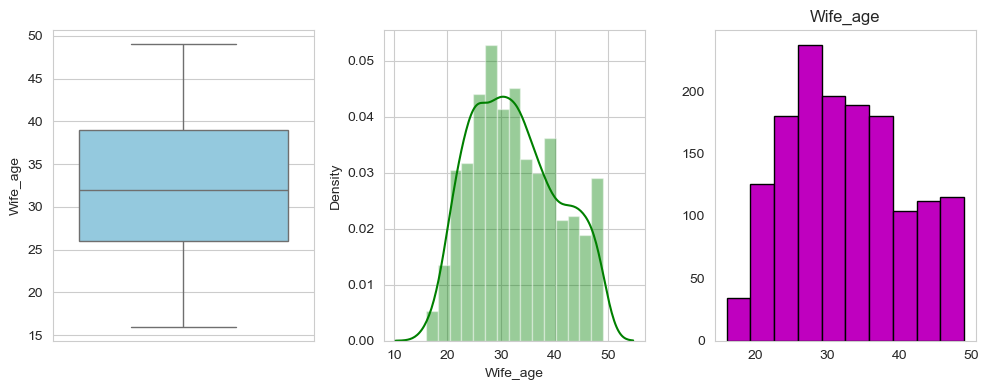

In [128]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('Wife_age')
sns.boxplot(df1['Wife_age'],orient='horizondal',color='skyblue', ax=axes[0])

sns.distplot(df1['Wife_age'], color='g',ax=axes[1])
df1.hist(column='Wife_age', grid=False, color='m',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

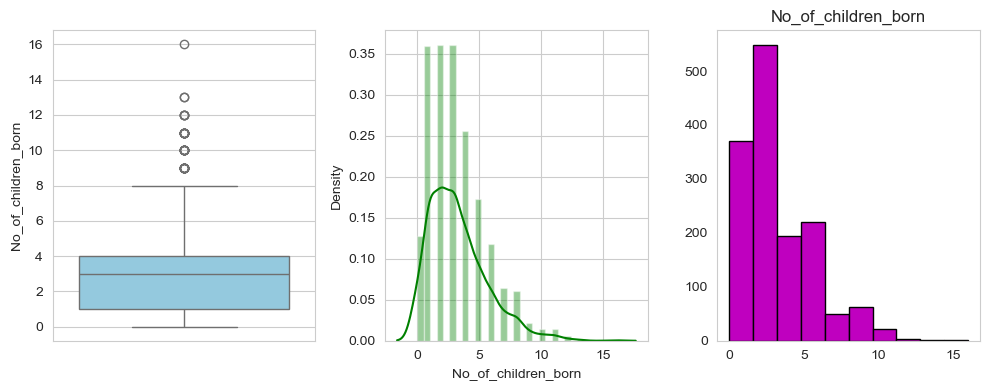

In [129]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('No_of_children_born')
sns.boxplot(df1['No_of_children_born'],orient='horizondal',color='skyblue', ax=axes[0])

sns.distplot(df1['No_of_children_born'], color='g',ax=axes[1])
df1.hist(column='No_of_children_born', grid=False, color='m',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

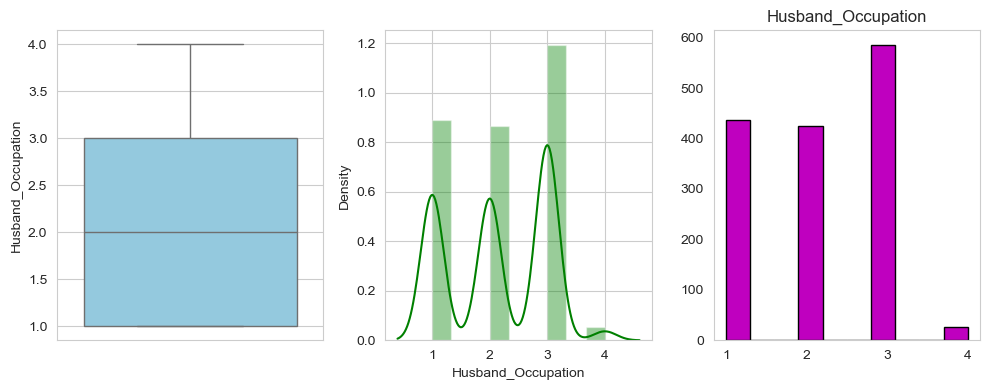

In [130]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('Husband_Occupation')
sns.boxplot(df1['Husband_Occupation'],orient='horizondal',color='skyblue', ax=axes[0])

sns.distplot(df1['Husband_Occupation'], color='g',ax=axes[1])
df1.hist(column='Husband_Occupation', grid=False, color='m',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

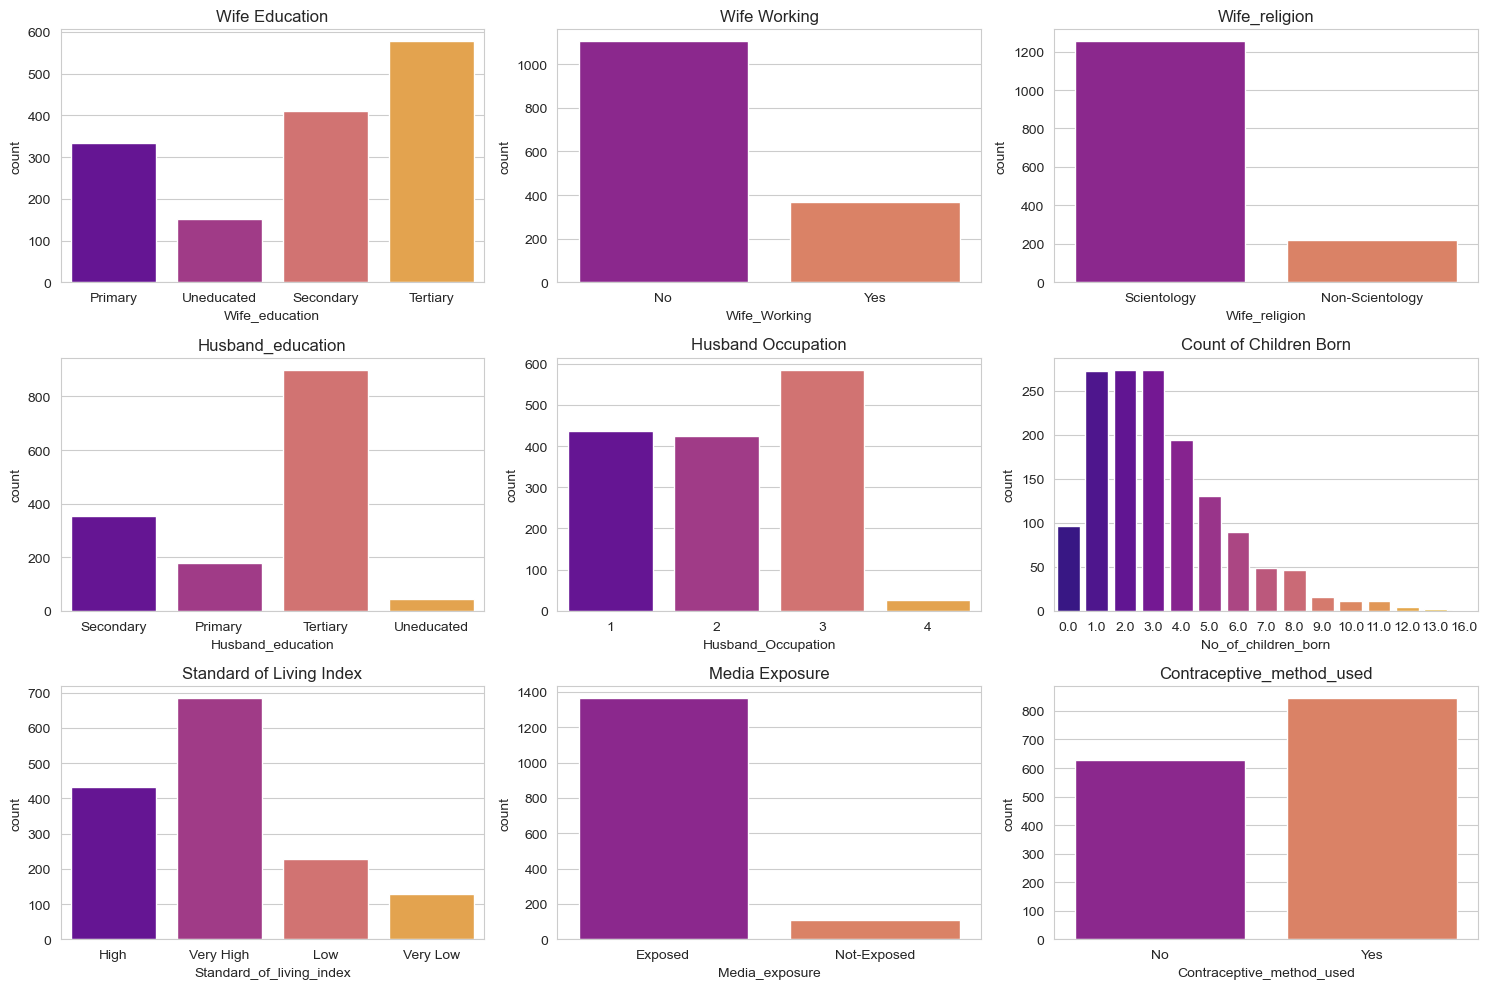

In [131]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()
variables = ['Wife_education', 'Wife_Working', 'Wife_religion', 'Husband_education', 'Husband_Occupation', 'No_of_children_born', 'Standard_of_living_index', 'Media_exposure', 'Contraceptive_method_used']
titles = ['Wife Education', 'Wife Working', 'Wife_religion', 'Husband_education', 'Husband Occupation', 'Count of Children Born', 'Standard of Living Index', 'Media Exposure', 'Contraceptive_method_used']

for i, var in enumerate(variables):
    sns.countplot(x = df1[var], palette='plasma', ax=axs[i])
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()

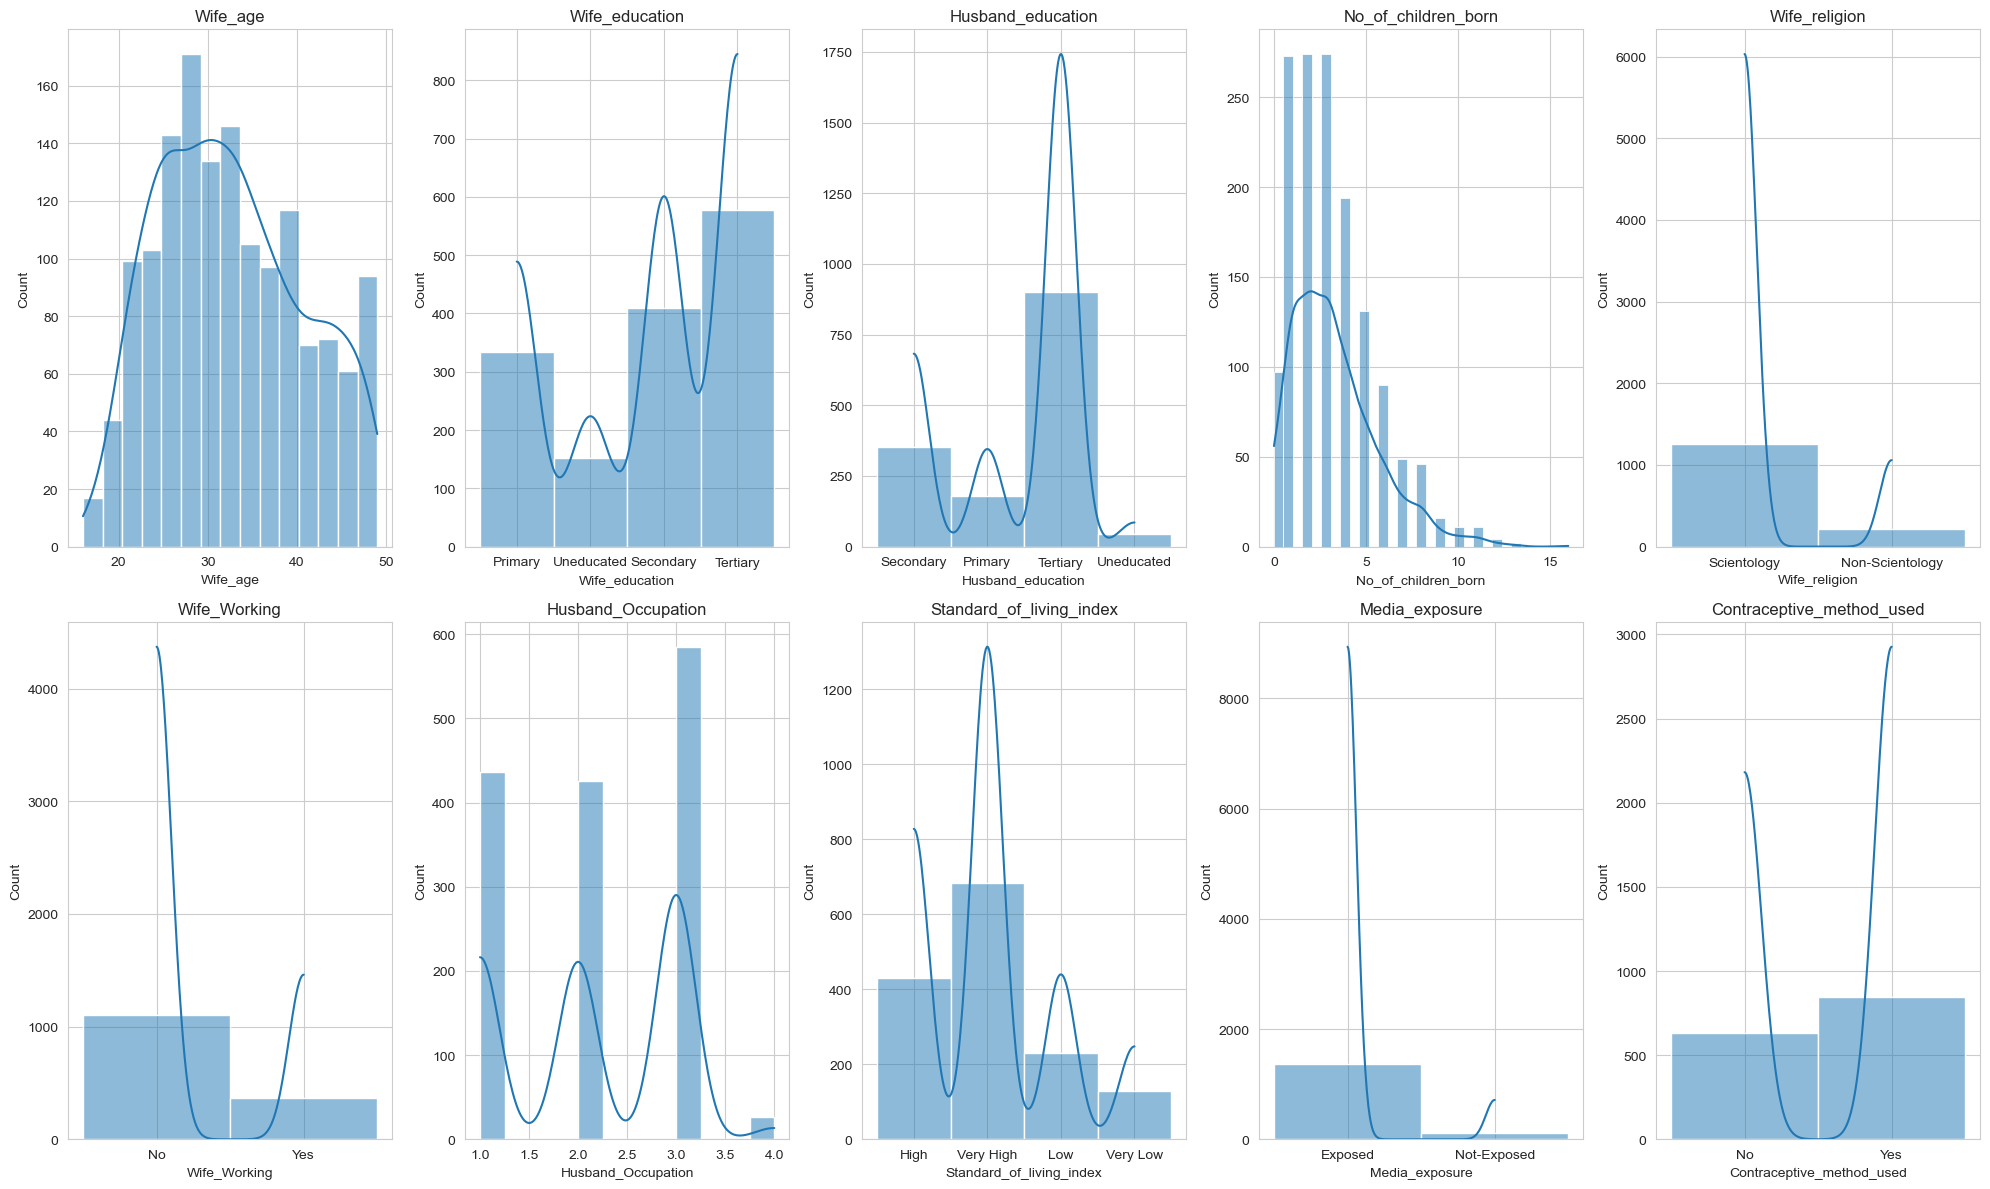

In [132]:
fig, axs = plt.subplots(2, 5, figsize=(20, 12))
axs = axs.flatten()

for i, col in enumerate(df1.columns):
    sns.histplot(df1[col], ax=axs[i],kde=True)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

#### Bivariate Analysis

<Figure size 2000x3000 with 0 Axes>

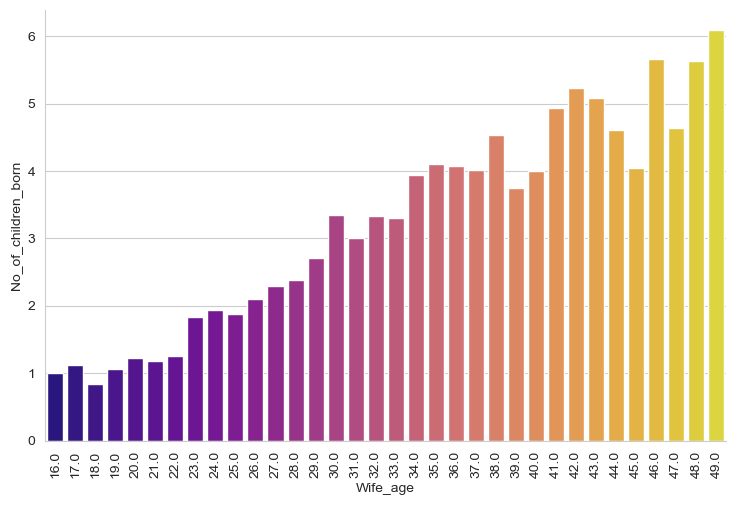

In [133]:
plt.figure(figsize=(20,30))
# Your catplot code here (remember, no need for plt.figure(figsize=(15,10)))
g = sns.catplot(data=df1, x="Wife_age", y="No_of_children_born", kind="bar", palette = 'plasma', ci=None, height=5, aspect=1.5);

# Rotating the x-axis values to vertical for each plot in your FacetGrid
g.set_xticklabels(rotation=90);

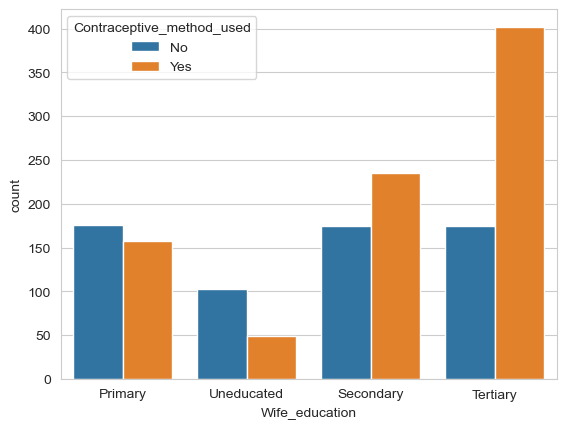

In [134]:
sns.countplot(data=df1, x="Wife_education", hue="Contraceptive_method_used");

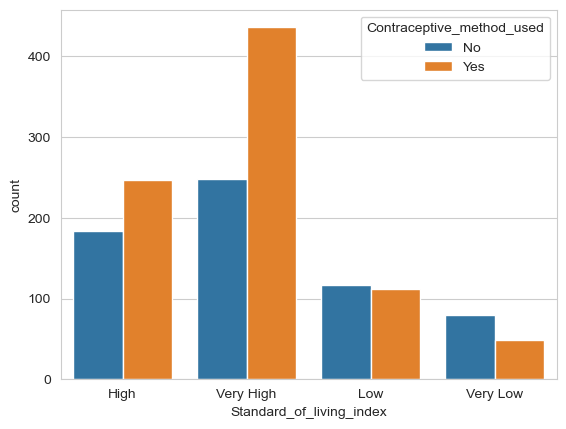

In [135]:
sns.countplot(data=data, x="Standard_of_living_index", hue="Contraceptive_method_used");

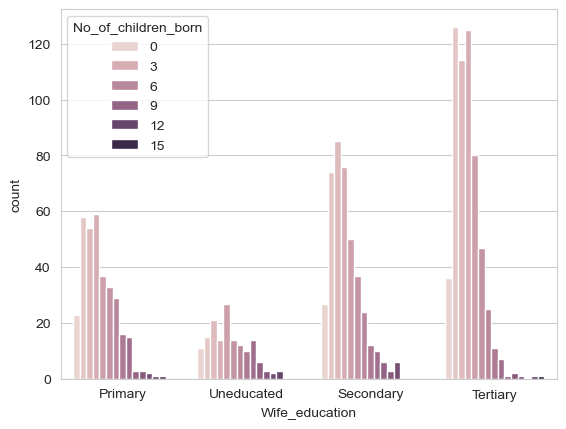

In [136]:
sns.countplot(data=df1, x="Wife_education", hue="No_of_children_born");

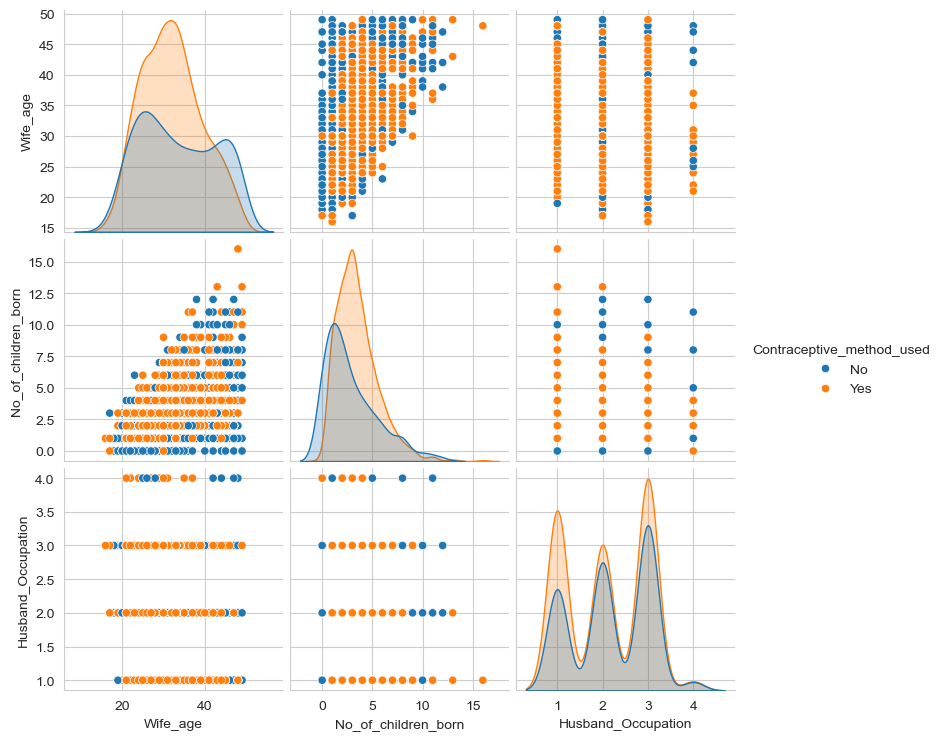

In [137]:
sns.pairplot(df1,hue='Contraceptive_method_used',diag_kind='kde');

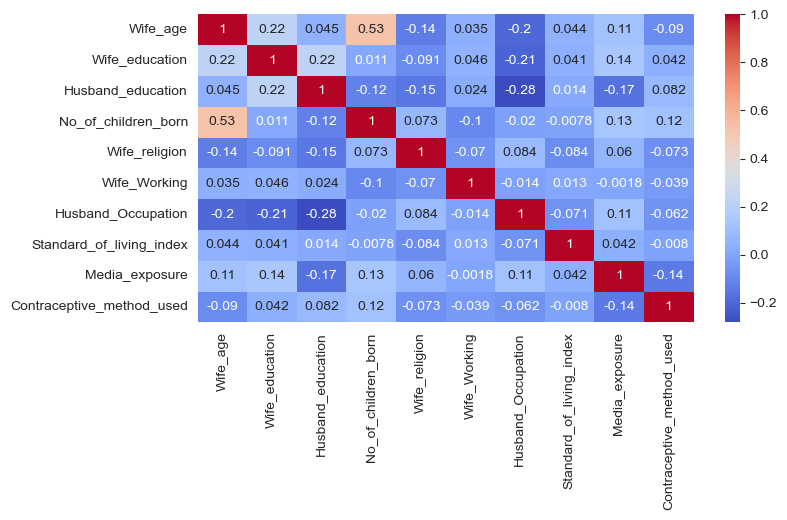

In [138]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data
data_encoded = data.copy()

# Initialize the label encoder
le = LabelEncoder()

# Loop over the columns and if the data type of any column is 'object', convert it to numerical
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = le.fit_transform(data_encoded[col])

# Now you can plot the heatmap
fig = plt.figure(figsize=(8, 4))
mask = np.triu(np.ones_like(data_encoded.corr()))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", annot_kws={'size': 10})
plt.show()

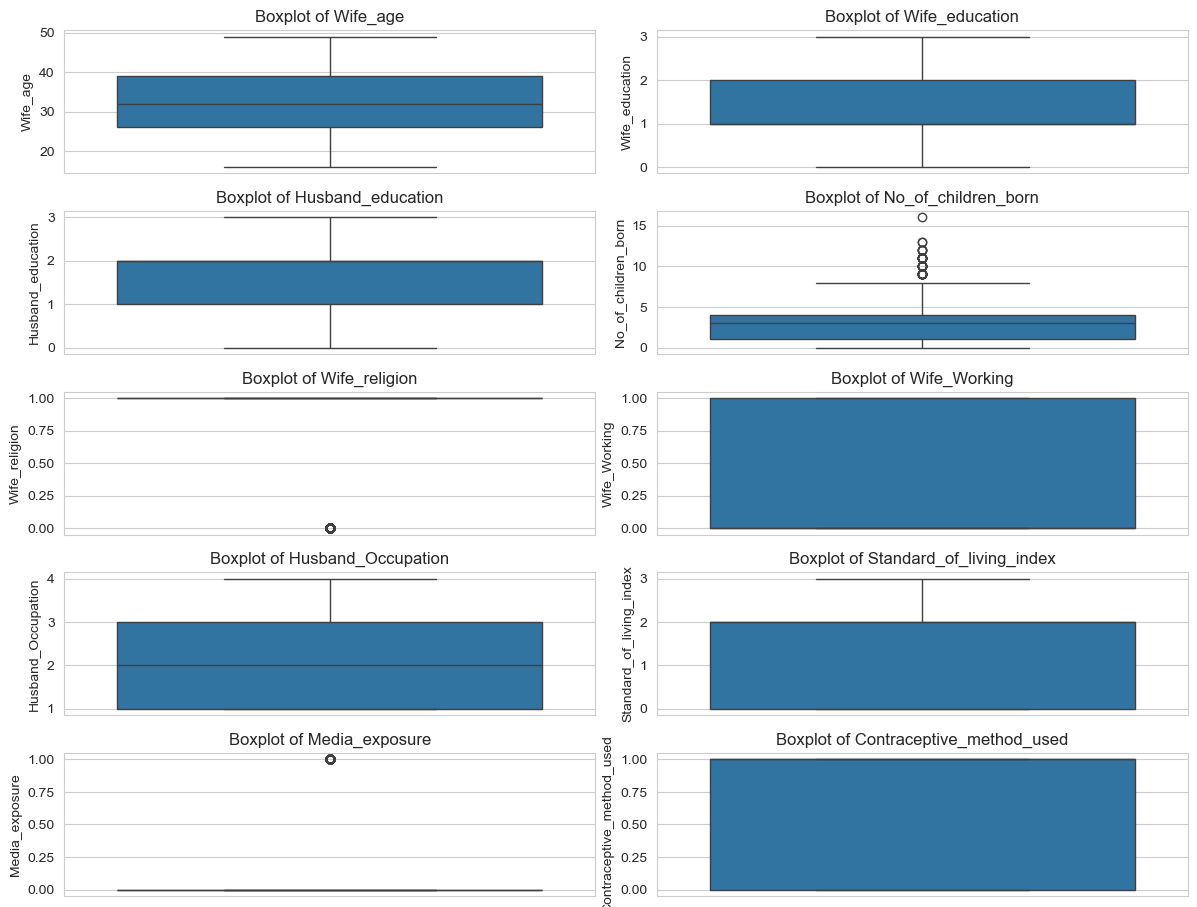

In [139]:
plt.figure(figsize=(12,20))
for i, col in enumerate(data_encoded.columns):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=data_encoded[col])
    plt.title('Boxplot of {}'.format(col))
plt.tight_layout()

In [140]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [141]:
for i, column in enumerate(data_encoded.columns):
    lr, ur = remove_outlier(data_encoded[column])
    data_encoded[column] = np.where(data_encoded[column] > ur, ur, data_encoded[column])
    data_encoded[column] = np.where(data_encoded[column] < lr, lr, data_encoded[column])

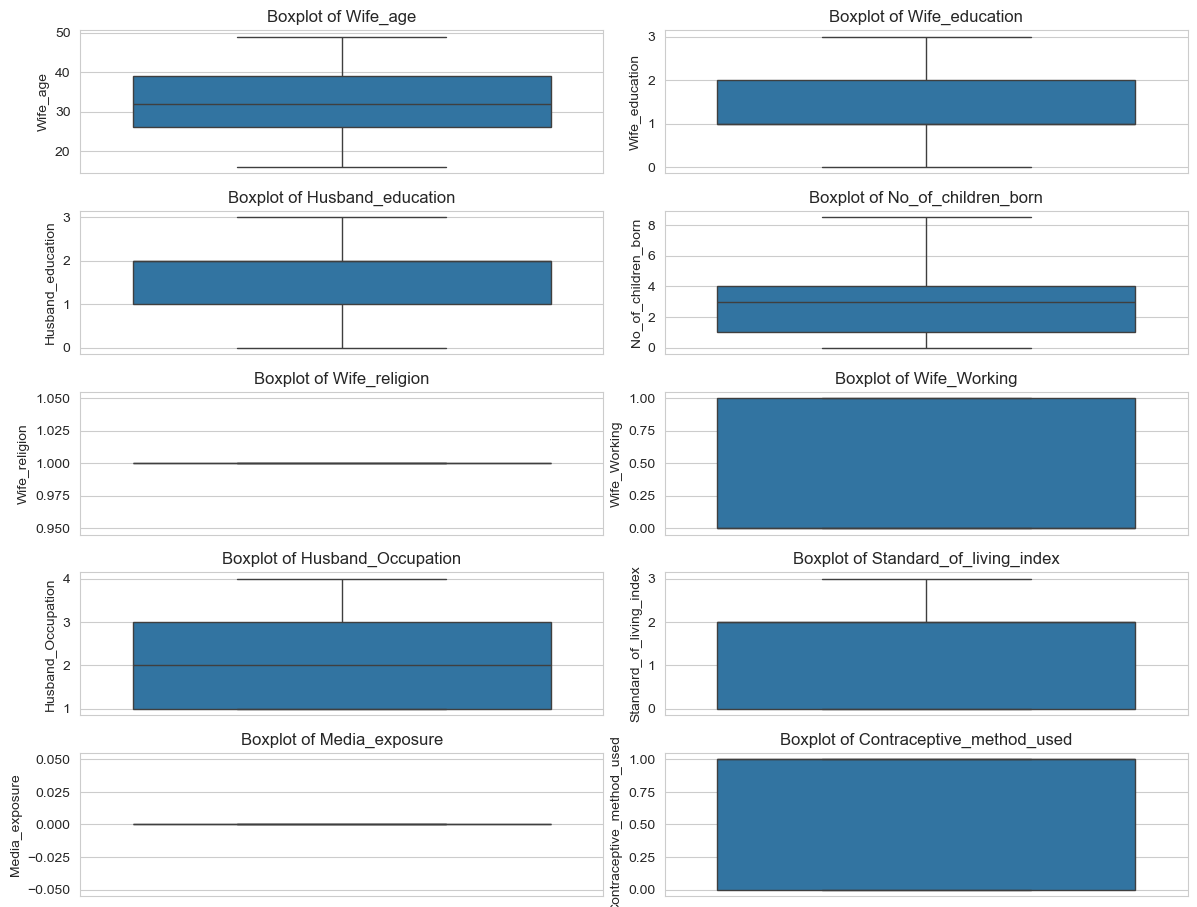

In [142]:
plt.figure(figsize=(12,20))
for i, col in enumerate(data_encoded.columns):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=data_encoded[col])
    plt.title('Boxplot of {}'.format(col))
plt.tight_layout()

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [143]:
education_mapping = {'Uneducated': 1, 'Primary': 2, 'Secondary': 3, 'Tertiary': 4}
Wife_religion = {'Scientology': 1, 'Non-Scientology': 0}
Wife_Working = {'Yes': 1, 'No': 0}
standard_living = {'Very Low': 1, 'Low': 2, 'High': 3, 'Very High': 4}
media = {'Exposed': 1, 'Not-Exposed': 0}
df1['Wife_education'] = df1['Wife_education'].map(education_mapping)
df1['Husband_education'] = df1['Husband_education'].map(education_mapping)
df1['Wife_religion'] = df1['Wife_religion'].map(Wife_religion)
df1['Wife_Working'] = df1['Wife_Working'].map(Wife_Working)
df1['Standard_of_living_index'] = df1['Standard_of_living_index'].map(standard_living)
df1['Media_exposure'] = df1['Media_exposure'].map(media)

In [144]:
df1['Contraceptive_method_used'] = df1['Contraceptive_method_used'].map({'Yes': 1, 'No': 0})

In [145]:
df1.head()

Wife_age  Wife_education  Husband_education  No_of_children_born  \
0      24.0               2                  3                  3.0   
1      45.0               1                  3                 10.0   
2      43.0               2                  3                  7.0   
3      42.0               3                  2                  9.0   
4      36.0               3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         3   
1              1             0                   3                         4   
2              1             0                   3                         4   
3              1             0                   3                         3   
4              1             0                   3                         2   

   Media_exposure  Contraceptive_method_used  
0               1                          0  
1               1                          0  
2               1                          0  
3               1                          0  
4               1                          0

In [146]:
df1['Contraceptive_method_used'].value_counts()

Contraceptive_method_used
1    844
0    629
Name: count, dtype: int64

In [147]:
df1['Wife_education'].value_counts()

Wife_education
4    577
3    410
2    334
1    152
Name: count, dtype: int64

In [148]:
df1['Husband_education'].value_counts()

Husband_education
4    899
3    352
2    178
1     44
Name: count, dtype: int64

In [149]:
df1['Husband_Occupation'].value_counts()

Husband_Occupation
3    585
1    436
2    425
4     27
Name: count, dtype: int64

In [150]:
df1['Wife_religion'].value_counts()

Wife_religion
1    1253
0     220
Name: count, dtype: int64

In [151]:
df1['Wife_Working'].value_counts()

Wife_Working
0    1104
1     369
Name: count, dtype: int64

In [152]:
df1['Standard_of_living_index'].value_counts()

Standard_of_living_index
4    684
3    431
2    229
1    129
Name: count, dtype: int64

In [153]:
df1['Media_exposure'].value_counts()

Media_exposure
1    1364
0     109
Name: count, dtype: int64

In [154]:
df1_dummy = pd.get_dummies(df1, drop_first=True)

In [155]:
df1_dummy.head()

Wife_age  Wife_education  Husband_education  No_of_children_born  \
0      24.0               2                  3                  3.0   
1      45.0               1                  3                 10.0   
2      43.0               2                  3                  7.0   
3      42.0               3                  2                  9.0   
4      36.0               3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         3   
1              1             0                   3                         4   
2              1             0                   3                         4   
3              1             0                   3                         3   
4              1             0                   3                         2   

   Media_exposure  Contraceptive_method_used  
0               1                          0  
1               1                          0  
2               1                          0  
3               1                          0  
4               1                          0

In [156]:
print('Number of rows: ', df1_dummy.shape[0], '\n''Number of columns: ', df1_dummy.shape[1])

Number of rows:  1473 
Number of columns:  10


there are Outliers in the Number of children variable. Logistic regression can be sensitive to outliers, and their presence can influence the estimation of coefficients and impact the performance of the model. However, we will build two models one with the outliers if in case the outliers were of importance and one without if the outliers were a misleading information

In [254]:
X = df1.drop('Contraceptive_method_used', axis=1)
y = df1['Contraceptive_method_used']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [255]:
dtc = DecisionTreeClassifier()
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))

print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.980601       0.658371
LDA                             0.677983       0.669683
Logistic Regression             0.685742       0.669683


In [256]:
# Grid Search CV:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


In [257]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=30)
#Using best parameters in above
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))

print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.772066       0.690045
LDA                             0.677983       0.669683
Logistic Regression             0.685742       0.669683


Clearly now the underfitting of the model in Decison tree is reduced and Decison tree classifier results in the best accuracy score thus this model will be selected for classification

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [258]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

In [259]:
print(model_score)

0.669683257918552


In [261]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       189
           1       0.67      0.82      0.74       253

    accuracy                           0.67       442
   macro avg       0.67      0.64      0.64       442
weighted avg       0.67      0.67      0.66       442



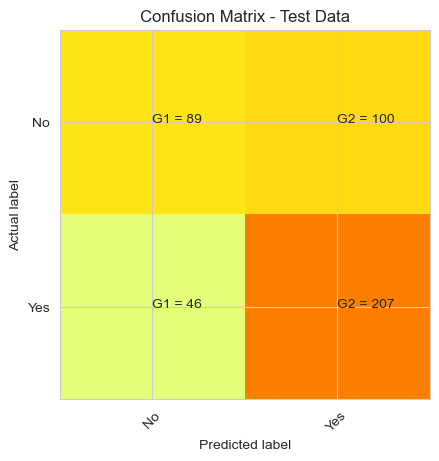

In [164]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [165]:
df2 = df1.copy()

In [166]:
len(df2.loc[df2['No_of_children_born']>5])

230

In [167]:
df2['No_of_children_born'] = np.where(df2['No_of_children_born'] > 5, 5, df2['No_of_children_born'])

In [168]:
len(df2.loc[df2['No_of_children_born']>5])

0

In [169]:
X = df2.drop(['Contraceptive_method_used'], axis=1)
y = df2['Contraceptive_method_used']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [170]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

In [171]:
print(model_score)

0.7104072398190046


In [172]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       189
           1       0.72      0.82      0.76       253

    accuracy                           0.71       442
   macro avg       0.71      0.69      0.69       442
weighted avg       0.71      0.71      0.70       442



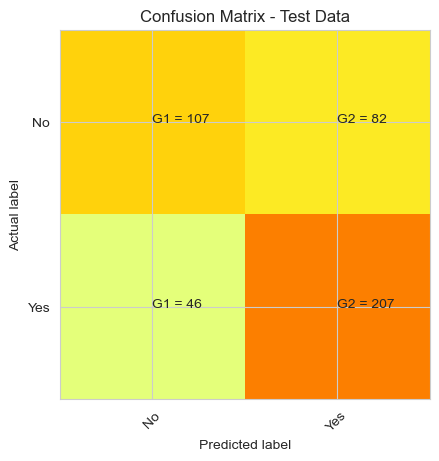

In [173]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC: 0.707


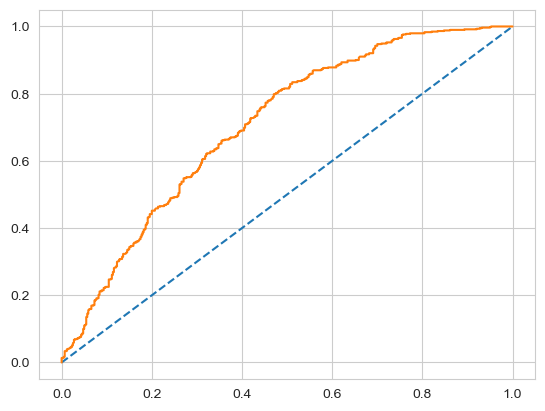

In [262]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.762


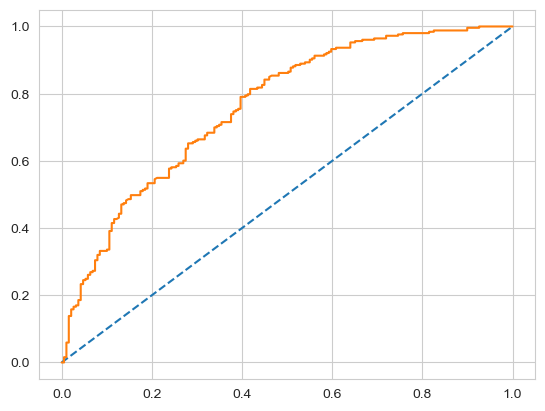

In [174]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

##### Linear Discriminant Analysis (LDA)

In [175]:
df3 = df2.copy()

In [176]:
X = df3.drop('Contraceptive_method_used', axis=1)
y = df3['Contraceptive_method_used']

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=7,stratify = y)

In [178]:
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [179]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

LinearDiscriminantAnalysis()

##### Training and Testing

In [180]:
# Training Data Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Testing Data Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

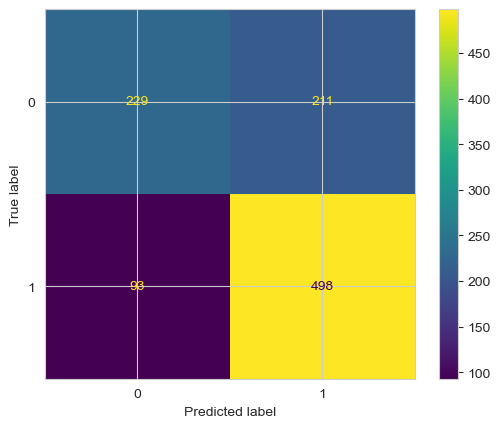

In [181]:
# Confusion matrix over the training data
cm = metrics.confusion_matrix(y_train, pred_class_train);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_);
disp.plot()

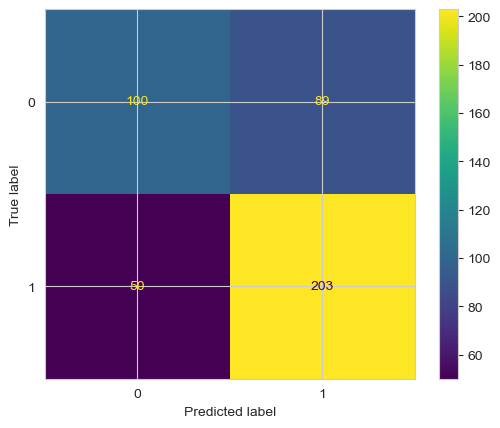

In [182]:
## Confusion matrix on the testing data
cm = metrics.confusion_matrix(y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [183]:
print('Classification Report of training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classificatio Report of testing data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of training data:

               precision    recall  f1-score   support

           0       0.71      0.52      0.60       440
           1       0.70      0.84      0.77       591

    accuracy                           0.71      1031
   macro avg       0.71      0.68      0.68      1031
weighted avg       0.71      0.71      0.70      1031
 

Classificatio Report of testing data:

               precision    recall  f1-score   support

           0       0.67      0.53      0.59       189
           1       0.70      0.80      0.74       253

    accuracy                           0.69       442
   macro avg       0.68      0.67      0.67       442
weighted avg       0.68      0.69      0.68       442
 



##### Probability prediction for the training and test data

In [184]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for Training Data: 0.754


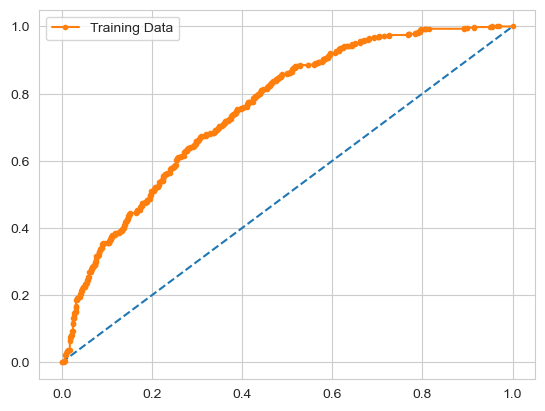

In [185]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for Testing Data: 0.748


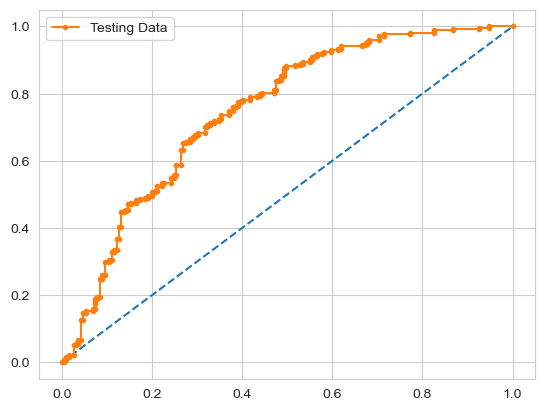

In [186]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for Testing Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Testing Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### CART Model

In [187]:
X = df1.drop('Contraceptive_method_used', axis=1)
y = df1['Contraceptive_method_used']
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=3)

In [188]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', random_state=3)

In [189]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=3)

In [190]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.324079
No_of_children_born       0.236207
Wife_education            0.109425
Standard_of_living_index  0.096565
Husband_education         0.079907
Husband_Occupation        0.073285
Wife_Working              0.037479
Wife_religion             0.026255
Media_exposure            0.016798


In [191]:
dt_model.score(X_train,train_labels) 

0.9786614936954413

In [192]:
dt_model.score(X_test, test_labels)

0.6244343891402715

##### looking at the training and testing data score we can say that the model is overfitting a result at high variance.

In [193]:
param_grid = { 'max_features': ['auto','sqrt','log2'],
             'ccp_alpha': [0.1, 0.01,.001],
             'max_depth': [1,5,10,15,20],
             'min_samples_leaf':[1,5,10,15,20],
             'criterion': ['gini','entropy']}

tree_class = DecisionTreeClassifier(random_state=7)
grid_search = GridSearchCV(estimator=tree_class, param_grid= param_grid, cv=5, verbose=True)
grid_search.fit(X_train,train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [194]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=15,
                       max_features='sqrt', min_samples_leaf=5, random_state=7)

In [195]:
reg_dt_model =  DecisionTreeClassifier(criterion = 'gini',ccp_alpha= 0.001, max_depth = 10,min_samples_leaf=5, random_state=7)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=5,
                       random_state=7)

In [196]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [197]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1031,)
ytest_predict (442,)


In [198]:
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,

#### Getting the Predicted Probabilities

In [199]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)

In [200]:
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.571429  0.428571
1  0.969231  0.030769
2  0.969231  0.030769
3  0.777778  0.222222
4  0.777778  0.222222

AUC: 0.859


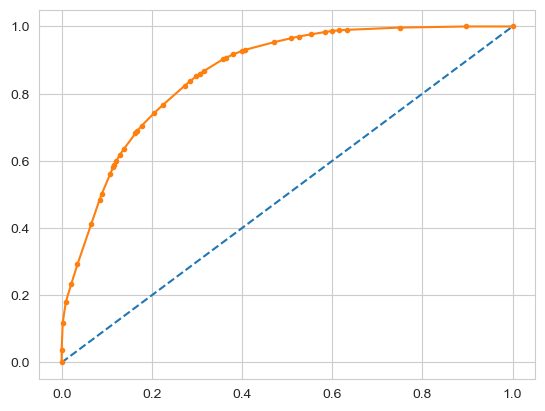

In [201]:
# AUC and ROC for the training data
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.732


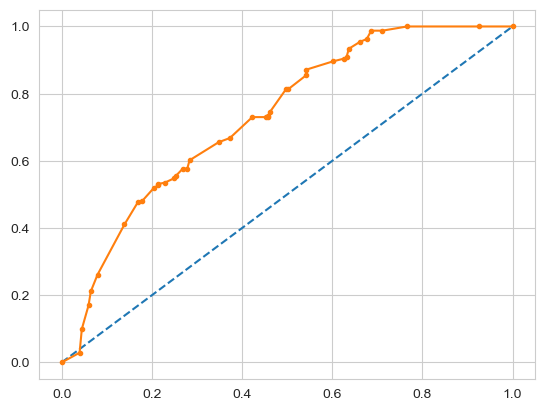

In [202]:
# AUC and ROC for the testing data
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [203]:
# confusion metrics for training data
metrics.confusion_matrix(train_labels, ytrain_predict)

array([[275, 153],
       [ 59, 544]], dtype=int64)

In [204]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7943743937924346

In [205]:
print(metrics.classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       428
           1       0.78      0.90      0.84       603

    accuracy                           0.79      1031
   macro avg       0.80      0.77      0.78      1031
weighted avg       0.80      0.79      0.79      1031



In [206]:
# Confusion Matrix for testing data
metrics.confusion_matrix(test_labels, ytest_predict)

array([[101, 100],
       [ 45, 196]], dtype=int64)

In [207]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6719457013574661

In [208]:
print(metrics.classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       201
           1       0.66      0.81      0.73       241

    accuracy                           0.67       442
   macro avg       0.68      0.66      0.66       442
weighted avg       0.68      0.67      0.66       442



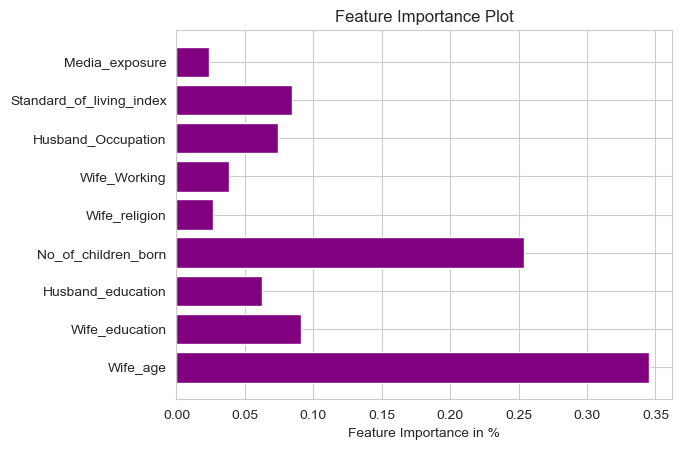

In [264]:
from sklearn.ensemble import RandomForestClassifier
X = df1.drop('Contraceptive_method_used', axis=1)
y = df1['Contraceptive_method_used']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a bar graph
features = X.columns
indices = range(len(importances))
plt.title('Feature Importance Plot')
plt.barh(indices, importances, color='purple')
plt.yticks(indices, features)
plt.xlabel('Feature Importance in %')
plt.show()